<a href="https://colab.research.google.com/github/NathanJohnK/Complete-Python-3-Bootcamp/blob/master/Colab_notebook_template_Nathan_S_final_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instructions

This document is a template to help you get started and will mirror the work that you will do in modules 2, 3, 4 and 5 with the Taxi Trip dataset problem.

You should save a copy of this in your Colab and change the name of the file to include your student number.

Within this document there are comments to help you along and some boilerplate code that you can adjust to get you started but the code will be very similar to that found in the practice document.

This document has the following sections and should be submitted with those in place:



*   Title
*   Introduction
*   Module 2: Get the data
*   Module 3: Basic statistics and visualisations
*   Module 4: Regression models
*   Module 5: Using the outcomes


Enjoy and learn lots.

# Problem: Can we accurately predict the number of collisions for any given day of the week?

##Introduction

You work as a product owner for a car insurance company offering a daily insurance policy for car rentals.   

The company operates in New York and wants to price its insurance to reflect collision risk and associated costs. It wants you to explore a new feature for development that will make better predictions about this. We will use New York traffic collision data to make estimates about the number of collisions on a given day.  

For this you require weather data as there has been a link between weather and traffic collisions. The company is using data given to them by the emergency services.

Note: You will be given a file entitled collisions_and_weather_data.csv testdata2019.csv. Due to Covid-19, all data since early 2020 has been fairly useless with respect to patterns. The company can see that the data has recently returned to full pre-pandemic levels and you will be provided data from 1st of January 2013 to 31st of December 2018 and the test data will be from 2019.

Remember, you will have to put these files in your Google Drive.

## Module 2: Get the data

This section contains boilerplate code. As long as you have uploaded your CSV files to your Google Drive, you can just run the cells as normal.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
#added seaborn as sns
import seaborn as sns

In [4]:
#set the size of our plots as they are a little small by default.
plt.rcParams["figure.figsize"] = (20,5)

In [5]:
# Link with your google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
# get our collated taxi trip and weather data from google drive
df = pd.read_csv('/content/gdrive/MyDrive/LBD_New_York_collisions_and_weather_data.csv')


Watch this...

https://us06web.zoom.us/rec/play/eScR8cyO0tk9T3XOv77BlebssDgiKGjSDeYmmxwTmrs9g6A91Jego_OkpKS3mioa1oipCPrzCUAqt4xL.MHHOsmGFhlUio3Mp?canPlayFromShare=true&from=share_recording_detail&continueMode=true&componentName=rec-play&originRequestUrl=https%3A%2F%2Fus06web.zoom.us%2Frec%2Fshare%2FCV9YLZWgX7wLqGhaRSR-MNwtxOMawl4DrLxmnzQAHA6fmQgfL8BoTcKcjo57o1Wd.OfJN_SEUuQNECDAp

Passcode: 1&Jim4@S


In [7]:
# Creating a dataframe to show the data
# This is returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.
df.head()


,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
0,2,2013,1,1,01/01/2013,37.8,23.6,1011.9,10.0,6.1,8.9,19.0,39.9,33.1,0.0,999.9,0,381
1,3,2013,1,2,02/01/2013,27.1,10.5,1016.8,10.0,5.3,9.9,19.0,33.1,21.9,0.0,999.9,0,480
2,4,2013,1,3,03/01/2013,28.4,14.1,1020.6,10.0,3.7,8.0,15.0,32.0,24.1,0.0,999.9,0,549
3,5,2013,1,4,04/01/2013,33.4,18.6,1017.0,10.0,6.5,13.0,24.1,37.0,30.0,0.0,999.9,0,505
4,6,2013,1,5,05/01/2013,36.1,18.7,1020.6,10.0,6.6,12.0,21.0,42.1,32.0,0.0,999.9,0,389


## Module 3: Basic statistics and visualisations SORT OUT lATER

Task is: Company wants to price its insurance to reflect collision risk and associated costs. It wants you to explore a new feature for development that will make better predictions about this.

In this section, I am going to investigate the data using some basic stats and visualisations. I have weather date and information about the number of collisions per day.

Specifically, I want to explore:
1. Top level - are there more accidents on one day of the week compared to another?
2. Are there more accidents in a particular month?
3. Are there more accidents in colder conditions?

My hypothesis is that: On some days, there are more crashes and this also depends on conditions too.


In [ ]:
df = df.sort_values(["year", "mo", "da"], ascending = (True, True, True)) # order the data by year, month, day in ascending order.
df.head() # check the data again by viewing the first 5 rows

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS,month
0,2,2013,1,1,2013-01-01,37.8,23.6,1011.9,10.0,6.1,8.9,19.0,39.9,33.1,0.0,999.9,0,381,1
1,3,2013,1,2,2013-02-01,27.1,10.5,1016.8,10.0,5.3,9.9,19.0,33.1,21.9,0.0,999.9,0,480,2
2,4,2013,1,3,2013-03-01,28.4,14.1,1020.6,10.0,3.7,8.0,15.0,32.0,24.1,0.0,999.9,0,549,3
3,5,2013,1,4,2013-04-01,33.4,18.6,1017.0,10.0,6.5,13.0,24.1,37.0,30.0,0.0,999.9,0,505,4
4,6,2013,1,5,2013-05-01,36.1,18.7,1020.6,10.0,6.6,12.0,21.0,42.1,32.0,0.0,999.9,0,389,5


In [ ]:
df.describe()
#The describe() method returns description of the data in the DataFrame

,day,year,mo,da,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS,month
count,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000
mean,4.000000,2015.500228,6.523962,15.726609,55.721086,41.120310,1107.412871,23.426654,50.871976,55.427704,384.628617,65.226974,47.875947,0.141031,920.095710,0.079416,602.121862,6.523962
std,2.000457,1.707859,3.449207,8.800821,17.506851,19.298085,895.814069,118.917338,209.762963,208.768664,473.640573,18.156330,17.152164,0.353569,270.092092,0.270448,102.452173,3.449207
min,1.000000,2013.000000,1.000000,1.000000,6.900000,-16.100000,992.100000,1.700000,0.000000,2.900000,14.000000,17.600000,-0.900000,0.000000,1.200000,0.000000,10.000000,1.000000
25%,2.000000,2014.000000,4.000000,8.000000,41.550000,26.400000,1012.700000,8.500000,3.100000,7.000000,18.100000,50.000000,35.100000,0.000000,999.900000,0.000000,533.000000,4.000000
50%,4.000000,2016.000000,7.000000,16.000000,56.900000,42.600000,1017.000000,9.800000,4.400000,8.900000,24.100000,66.900000,48.000000,0.000000,999.900000,0.000000,604.000000,7.000000
75%,6.000000,2017.000000,10.000000,23.000000,71.900000,57.500000,1022.000000,10.000000,5.900000,11.100000,999.900000,82.000000,64.000000,0.080000,999.900000,0.000000,670.000000,10.000000
max,7.000000,2018.000000,12.000000,31.000000,89.100000,74.800000,9999.900000,999.900000,999.900000,999.900000,999.900000,98.100000,82.900000,4.530000,999.900000,1.000000,1161.000000,12.000000


<ipython-input-36-16f4905ecfe8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr()


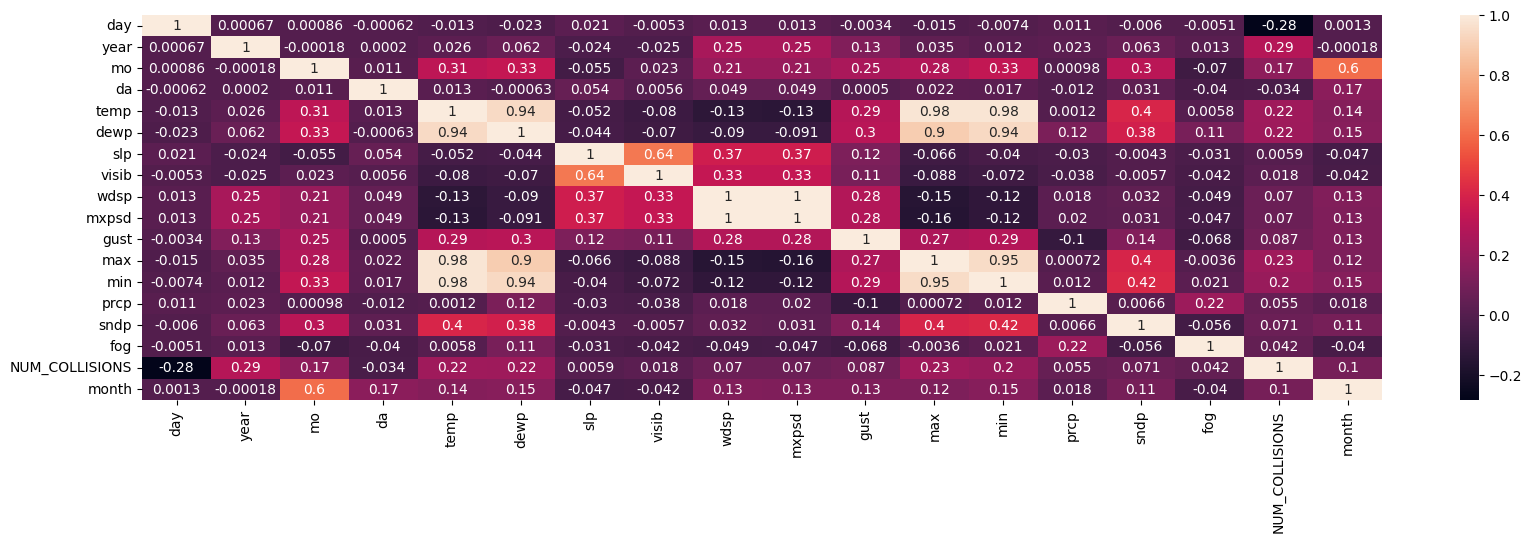

In [ ]:
corrMatrix = df.corr()
# Creates correlation matrix which shows all the correlations we have
sn.heatmap(corrMatrix, annot=True)
#Makes a heatmap of the matrix
plt.show()
# Plots the above

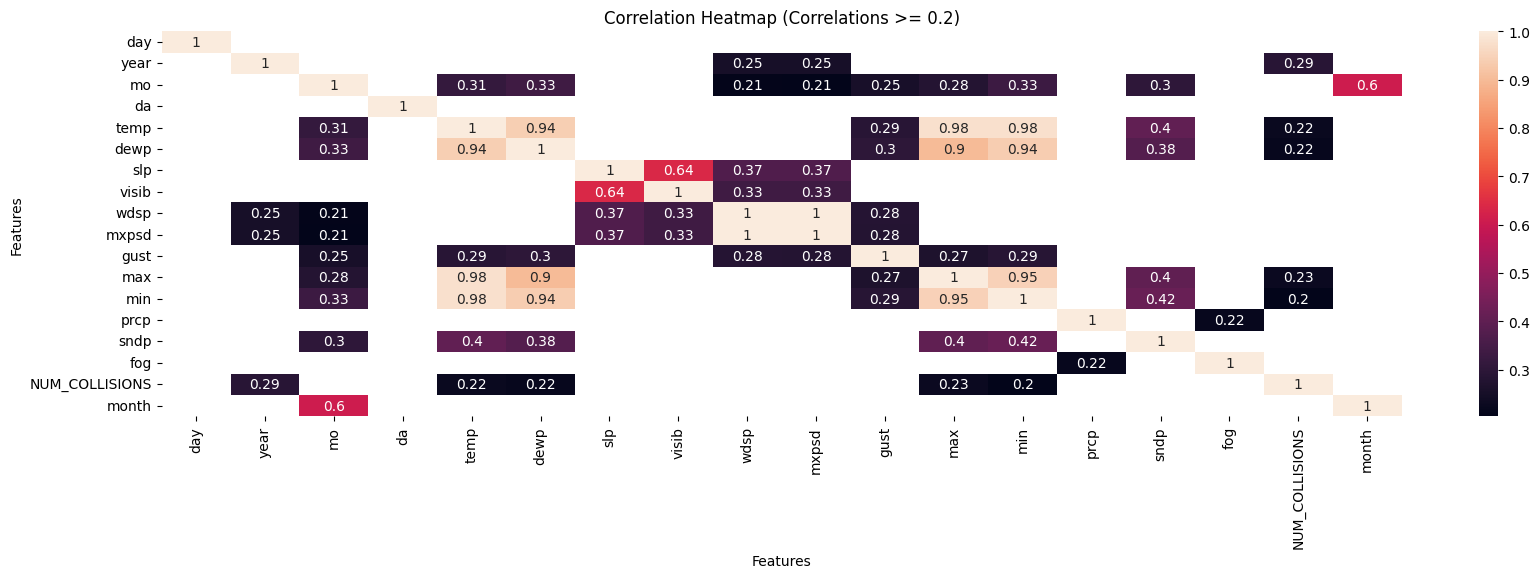

In [ ]:
# Filter correlations above 0.4
corrMatrix_filtered = corrMatrix[(corrMatrix > 0.4) | (corrMatrix >= 0.2)]

# Plot heatmap
sns.heatmap(corrMatrix_filtered, annot=True)

# Add title and axis labels
plt.title('Correlation Heatmap (Correlations >= 0.2)')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

# Focussing mainly on correlations between Num_collisions and other variables

# Interesting findings around min and max temperature but nothing really correlating. Temp and snow depth, as you'd expect




**More weather bits

**Next section examines the basic statistics around the collisions per day**

In [ ]:
# Group the data by the day of the week and calculate the sum of collisions for each day
collisions_per_day = df.groupby('day')['NUM_COLLISIONS'].sum().reset_index()

# Rename the columns for clarity
collisions_per_day.columns = ['Day of the Week', 'Total Collisions']

# Sort the table by total collisions in descending order
collisions_per_day = collisions_per_day.sort_values(by='Total Collisions', ascending=False)

# Display the table
print(collisions_per_day)

##Interesting - Friday as the most collisions, with Sunday the least - rush hour, commuting
## so what's the connection between Friday and Sunday. Sunday is a quieter day, Friday busier. Don't have a time of day so can't look at this in more detail.
##is there time data available?


#Correlation between weather? Rainfall on a particular day? or by month?

NameError: name 'df' is not defined

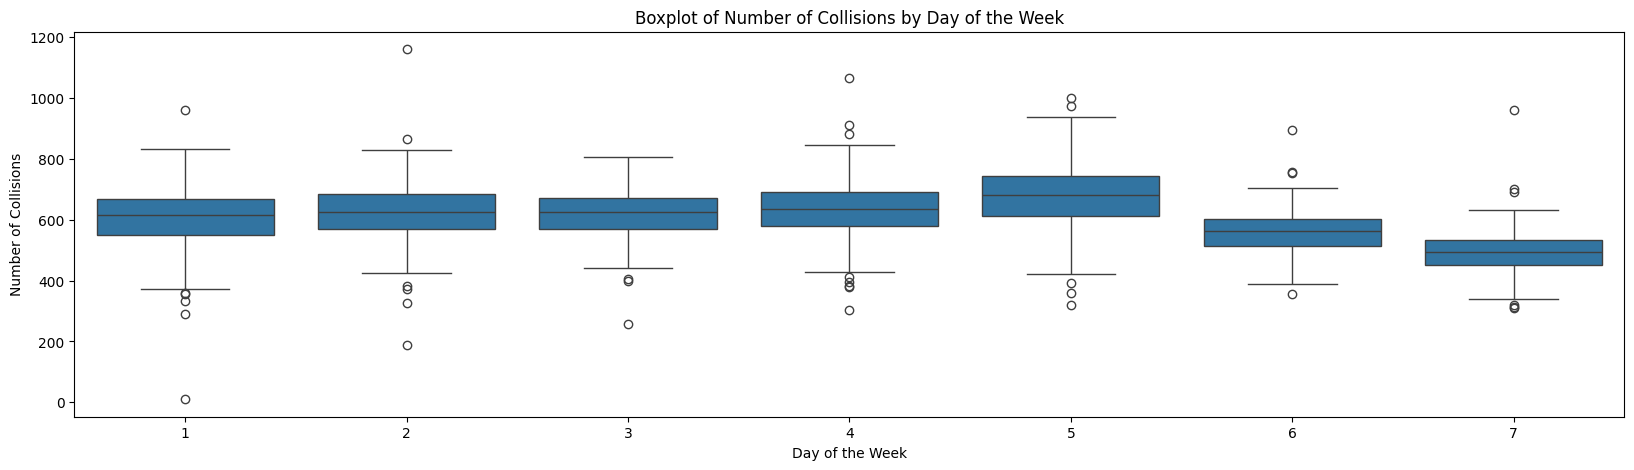

In [ ]:
sns.boxplot(x=df['day'], y=df['NUM_COLLISIONS'])
plt.xlabel('Day of the Week')
plt.ylabel('Number of Collisions')
plt.title('Boxplot of Number of Collisions by Day of the Week')
plt.show()

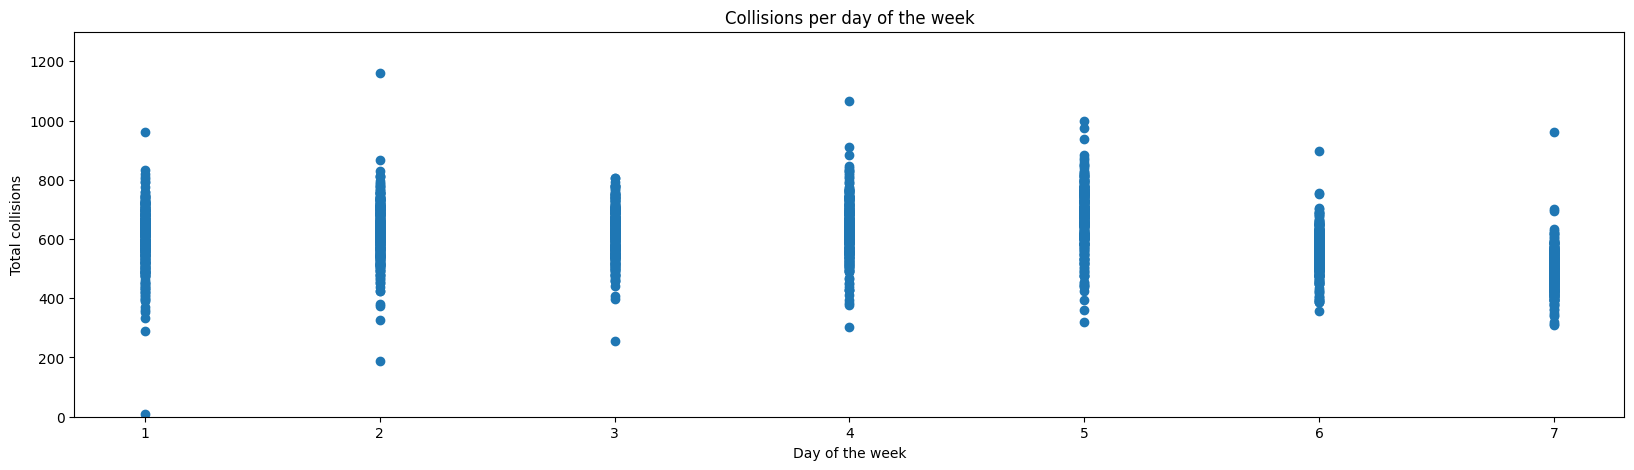

In [ ]:
#Let's be really clear here - 'day' is refering to the day of the week.

plt.ylim(0, 1300)
plt.scatter(df.day, df.NUM_COLLISIONS)
plt.title('Collisions per day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Total collisions')

plt.show()
## code snippet is visualizing the relationship between the day and NUM_COLLISIONS columns from the DataFrame df using a scatter plot, with the y-axis limited to values between 0 and 1300.


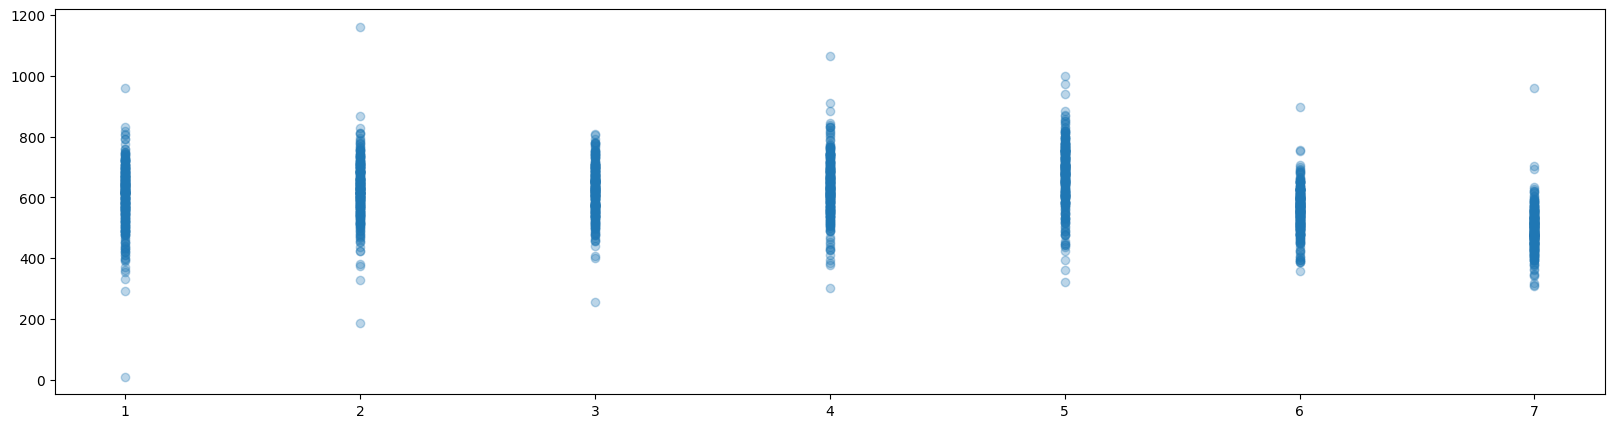

In [ ]:
plt.scatter(df.day, df.NUM_COLLISIONS, alpha=0.3)
plt.show()

##This code creates a scatter plot using matplotlib's scatter function, representing the relationship between the day and NUM_COLLISIONS columns from the DataFrame df.
## The parameter alpha=0.3 sets the transparency level of the markers to 0.3, making them slightly transparent.



There will be some analysis and repetition of processes here while trying to find linear relationships, such as cleaning the data and testing different years.

The plot below is using the untouched dataframe **df**. You should change this to reflect any of the cleaning you have done.

Looking at collisions per year

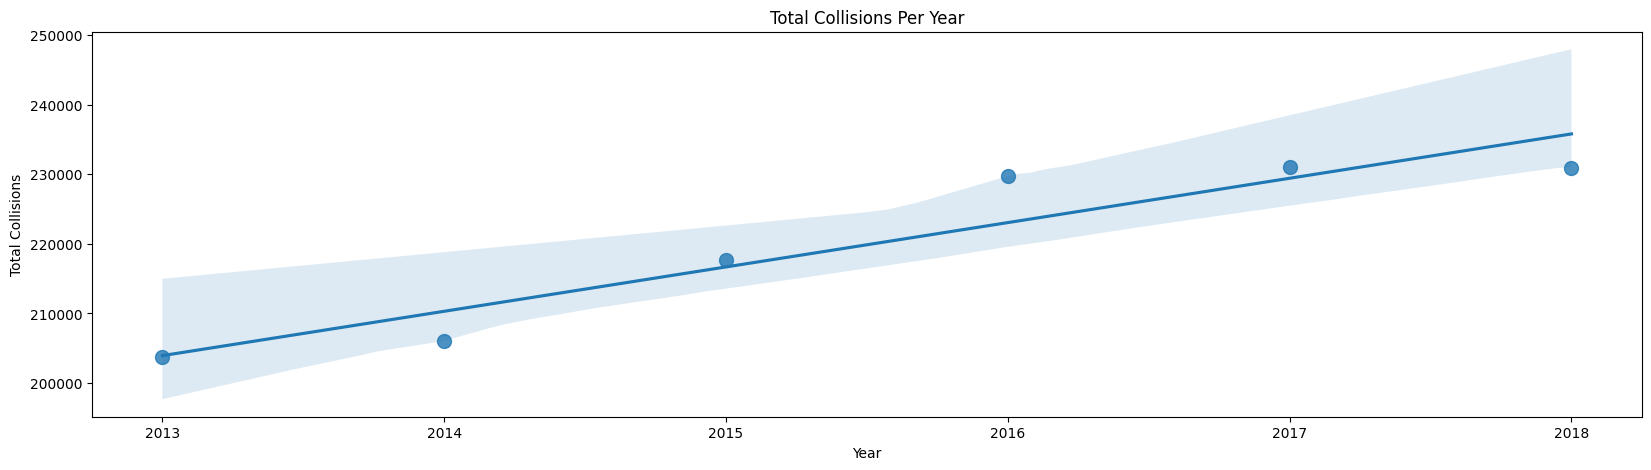

In [ ]:
# Convert the 'collision_date' column to datetime format
df['collision_date'] = pd.to_datetime(df['collision_date'])

# Extract the year from the 'collision_date' column
df['year'] = df['collision_date'].dt.year

# Group the data by year and calculate the total collisions for each year
collisions_per_year = df.groupby('year')['NUM_COLLISIONS'].sum().reset_index()

# Plot the chart with a line of best fit
sns.regplot(x='year', y='NUM_COLLISIONS', data=collisions_per_year, scatter_kws={"s": 100})

# Add title and labels
plt.title('Total Collisions Per Year')
plt.xlabel('Year')
plt.ylabel('Total Collisions')

plt.show()


##Insight - collisions are growing year on year

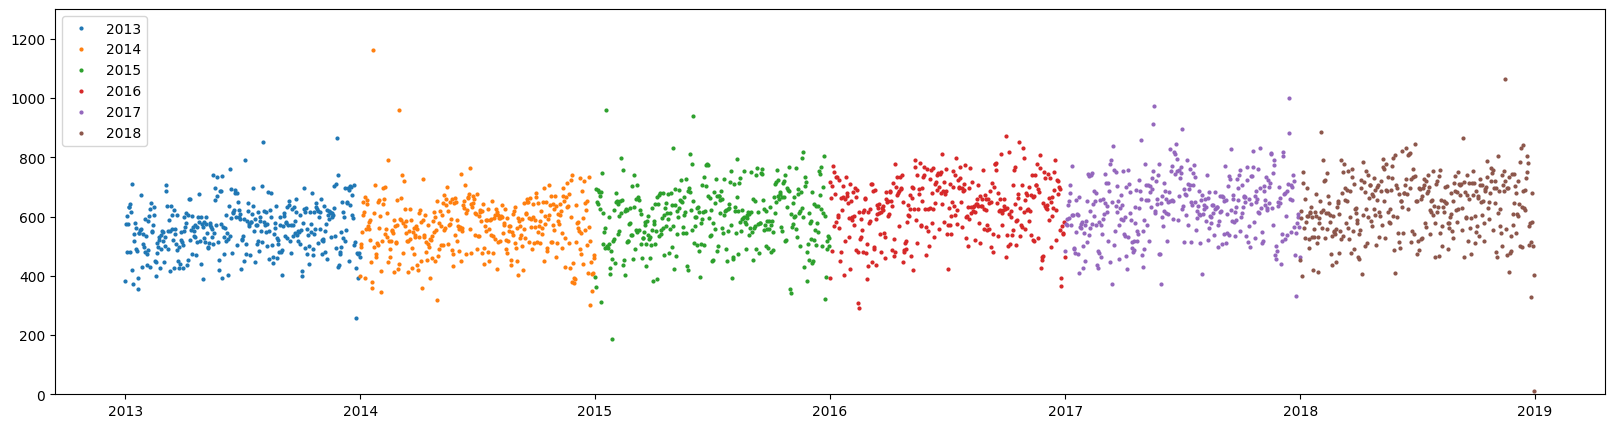

In [ ]:

groups = df.groupby('year') # We group by year as we want to create a legend and make the visualisation clearer using colour.
plt.ylim(0, 1300)
for name, group in groups:
    plt.plot(group.collision_date, group.NUM_COLLISIONS, marker='o', linestyle='', markersize=2, label=name)

plt.legend()

print("")

Collisions per day of the month? Compared across each month across all years?





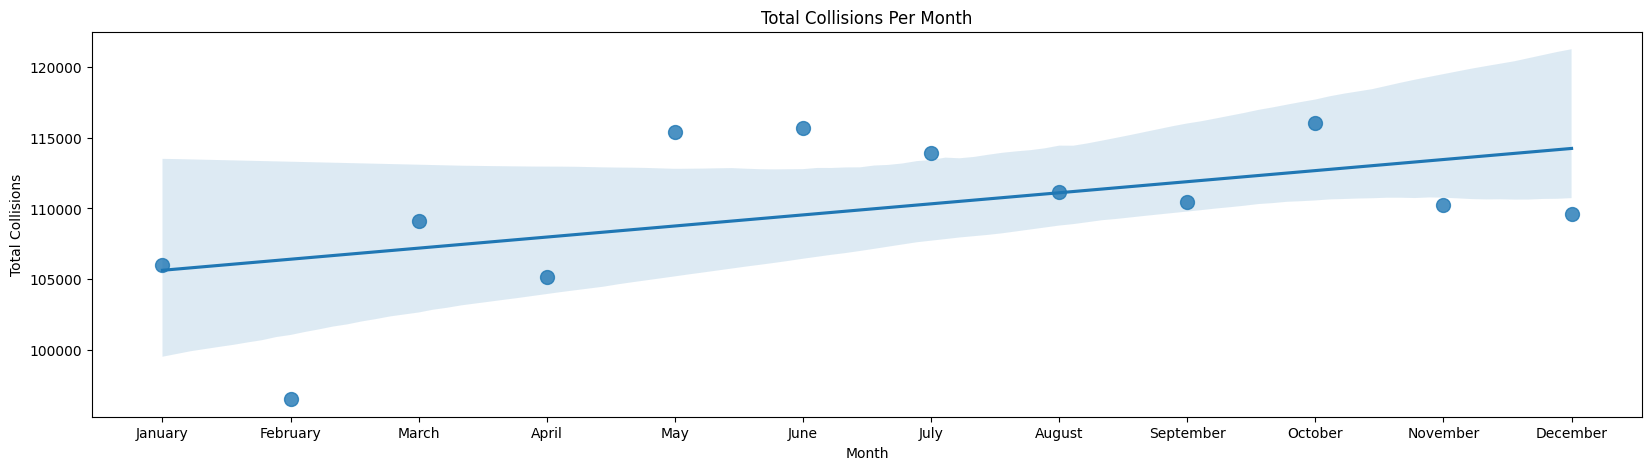

In [ ]:
# Assuming you have a DataFrame named df

# Convert the 'collision_date' column to datetime format
df['collision_date'] = pd.to_datetime(df['collision_date'])

# Extract the month from the 'collision_date' column
df['month'] = df['collision_date'].dt.month

# Group the data by month and calculate the total collisions for each month
collisions_per_month = df.groupby('month')['NUM_COLLISIONS'].sum().reset_index()

# Plot the chart with a line of best fit
sns.regplot(x='month', y='NUM_COLLISIONS', data=collisions_per_month, scatter_kws={"s": 100})

# Customize x-axis labels
plt.xticks(ticks=range(1, 13), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Add title and labels
plt.title('Total Collisions Per Month')
plt.xlabel('Month')
plt.ylabel('Total Collisions')

plt.show()

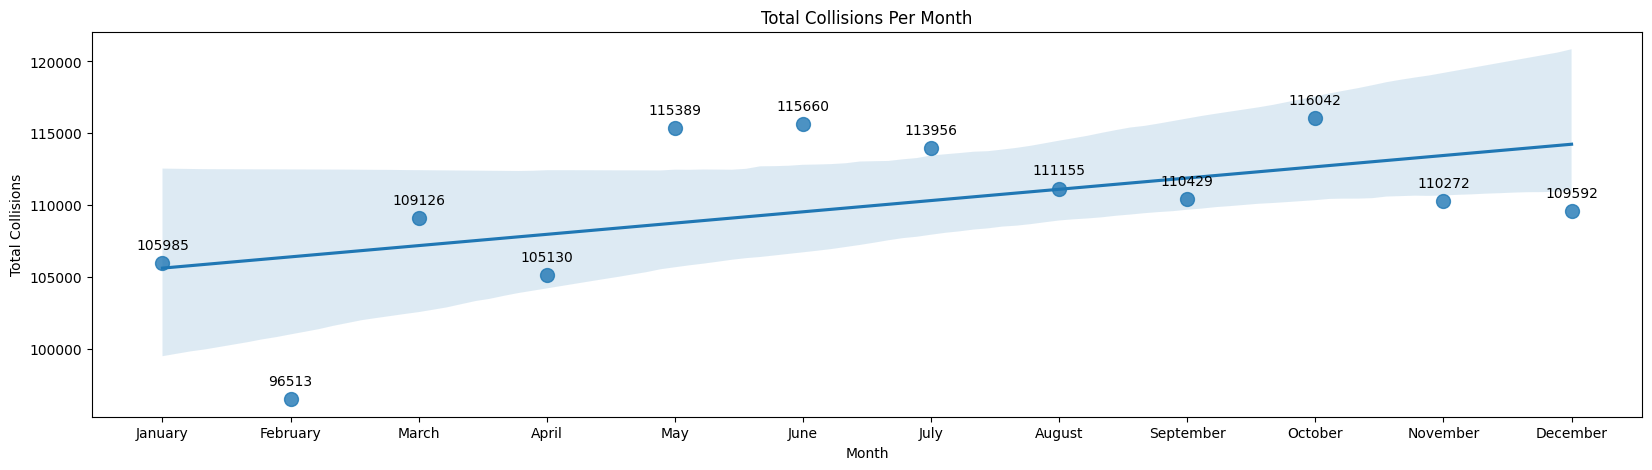

ANOVA F-statistic: 9.036799226003394
P-value: 5.82439802799302e-16
      group1     group2  meandiff   p-adj    lower     upper  reject
50      June   December  -53.3513  0.0000 -87.7098  -18.9927    True
46      June     August  -44.9480  0.0012 -79.3066  -10.5895    True
64   October   December  -34.6774  0.0418 -68.7532   -0.6017    True
30     April        May   36.3154  0.0276   1.9569   70.6739    True
27     March    October   37.1828  0.0188   3.1071   71.2585    True
35     April    October   39.8262  0.0084   5.4676   74.1847    True
19  February   November   41.5394  0.0065   6.3412   76.7375    True
15  February       July   41.5838  0.0057   6.6617   76.5060    True
17  February  September   42.4116  0.0047   7.2134   77.6098    True
9    January   November   42.8104  0.0028   8.4519   77.1689    True
5    January       July   42.8548  0.0024   8.7791   76.9306    True
7    January  September   43.6826  0.0020   9.3241   78.0411    True
13  February        May   49.2881  0

In [ ]:

# Assuming you have a DataFrame named df

# Convert the 'collision_date' column to datetime format
df['collision_date'] = pd.to_datetime(df['collision_date'])

# Extract the month from the 'collision_date' column
df['month'] = df['collision_date'].dt.month

# Group the data by month and calculate the total collisions for each month
collisions_per_month = df.groupby('month')['NUM_COLLISIONS'].sum().reset_index()

# Plot the chart with a line of best fit
sns.regplot(x='month', y='NUM_COLLISIONS', data=collisions_per_month, scatter_kws={"s": 100})

# Add data labels (annotations)
for i, row in collisions_per_month.iterrows():
    plt.annotate(row['NUM_COLLISIONS'], (row['month'], row['NUM_COLLISIONS']), textcoords="offset points", xytext=(0,10), ha='center')

# Customize x-axis labels
plt.xticks(ticks=range(1, 13), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Add title and labels
plt.title('Total Collisions Per Month')
plt.xlabel('Month')
plt.ylabel('Total Collisions')

plt.show()


# Anova
from scipy.stats import f_oneway

# Assuming collisions_per_month DataFrame contains data for each month
# Perform ANOVA test
f_statistic, p_value = f_oneway(df[df['month'] == 1]['NUM_COLLISIONS'],
                                 df[df['month'] == 2]['NUM_COLLISIONS'],
                                 df[df['month'] == 3]['NUM_COLLISIONS'],
                                 df[df['month'] == 4]['NUM_COLLISIONS'],
                                 df[df['month'] == 5]['NUM_COLLISIONS'],
                                 df[df['month'] == 6]['NUM_COLLISIONS'],
                                 df[df['month'] == 7]['NUM_COLLISIONS'],
                                 df[df['month'] == 8]['NUM_COLLISIONS'],
                                 df[df['month'] == 9]['NUM_COLLISIONS'],
                                 df[df['month'] == 10]['NUM_COLLISIONS'],
                                 df[df['month'] == 11]['NUM_COLLISIONS'],
                                 df[df['month'] == 12]['NUM_COLLISIONS'])

print("ANOVA F-statistic:", f_statistic)
print("P-value:", p_value)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Define a dictionary to map month numbers to month names
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(df['NUM_COLLISIONS'], df['month'])

# Get significant differences
significant_differences = tukey_results.summary().data

# Convert the result to DataFrame
significant_differences_df = pd.DataFrame(significant_differences[1:], columns=significant_differences[0])

# Map month numbers to month names
significant_differences_df['group1'] = significant_differences_df['group1'].astype(int).map(month_names)
significant_differences_df['group2'] = significant_differences_df['group2'].astype(int).map(month_names)

# Filter significant differences
significant_differences_df = significant_differences_df[significant_differences_df['reject']]

# Sort significant differences based on the mean difference (meandiff column)
significant_differences_sorted = significant_differences_df.sort_values(by='meandiff')

# Print significant differences
print(significant_differences_sorted)



###Data cleaning###




This section will present my process of cleaning/ trimming the data and the subsequent analysis and findings.

Again 'Narrative' marks the narrative of the analysis

In [ ]:
#Delete me!!! timestamp in video is 20:20

# In this section, I am trimming the data to keep rows where number of collisions is greater than 350 but less than 900
#This will help to trim the data down

df_300000_cleaned = df[df["NUM_COLLISIONS"] > 350] # Create a new dataframe keeping all datapoints where NUM_TRIPS are greater than 350000
df_cleaned = df_300000_cleaned[df_300000_cleaned["NUM_COLLISIONS"] < 900] # Using the new dataframe we just created, keep all datapoints where NUM_TRIPS are less than 600000

# Narrative - ok so now have a fresh dataframe

In [ ]:
#view the data

df_cleaned.describe()
#The describe() method returns description of the data in the DataFrame

,day,year,mo,da,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS,month
count,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.00000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000
mean,3.997234,2015.500231,6.523283,15.713693,55.898340,41.29041,1104.149009,23.122361,49.502075,54.063485,384.706639,65.401153,48.041909,0.141185,922.499216,0.076994,602.707699,6.520055
std,1.997229,1.709838,3.431665,8.798461,17.399642,19.21932,879.811446,117.655011,206.799253,205.819491,473.667291,18.072771,17.065649,0.354422,266.331446,0.266643,96.516008,3.434373
min,1.000000,2013.000000,1.000000,1.000000,9.700000,-11.80000,992.100000,1.700000,0.000000,2.900000,14.000000,17.600000,1.900000,0.000000,1.200000,0.000000,355.000000,1.000000
25%,2.000000,2014.000000,4.000000,8.000000,41.900000,26.60000,1012.700000,8.500000,3.100000,7.000000,18.100000,50.000000,35.100000,0.000000,999.900000,0.000000,535.000000,4.000000
50%,4.000000,2016.000000,7.000000,16.000000,57.200000,42.90000,1017.000000,9.800000,4.300000,8.900000,24.100000,66.900000,48.200000,0.000000,999.900000,0.000000,605.000000,7.000000
75%,6.000000,2017.000000,9.000000,23.000000,72.000000,57.50000,1021.900000,10.000000,5.900000,11.100000,999.900000,82.000000,64.000000,0.080000,999.900000,0.000000,669.000000,9.000000
max,7.000000,2018.000000,12.000000,31.000000,89.100000,74.80000,9999.900000,999.900000,999.900000,999.900000,999.900000,98.100000,82.900000,4.530000,999.900000,1.000000,896.000000,12.000000


### Annual differences ###

In [ ]:
#Check how many collisions  per year

# Grouping by 'YEAR' and summing 'NUM_COLLISIONS' for each year
collisions_per_year = df_cleaned.groupby('year')['NUM_COLLISIONS'].sum()

# Displaying the number of collisions per year
print("Number of collisions per year:")
print(collisions_per_year)


Number of collisions per year:
year
2013    203477
2014    202596
2015    214632
2016    229231
2017    227790
2018    229547
Name: NUM_COLLISIONS, dtype: int64


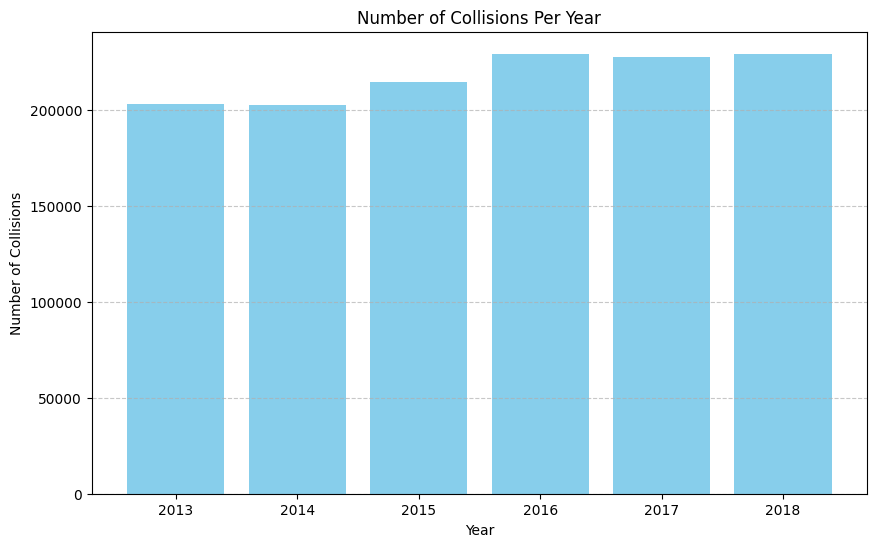

In [ ]:
import matplotlib.pyplot as plt

# Grouping by 'year' and summing 'NUM_COLLISIONS' for each year
collisions_per_year = df_cleaned.groupby('year')['NUM_COLLISIONS'].sum()

# Convert the series to a DataFrame for plotting
collisions_per_year_df = collisions_per_year.reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(collisions_per_year_df['year'], collisions_per_year_df['NUM_COLLISIONS'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Collisions')
plt.title('Number of Collisions Per Year')
plt.xticks(collisions_per_year_df['year'])  # Ensure all years are displayed on the x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Narrative - ok clearly collisions are increasing, year on year

### Analysis of each individual year###

In [ ]:
#Narrative - I am going to examine whether the number of collisions for each day of the week changes from year to year

# Define a mapping for days of the week
day_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}

# Apply the day mapping to the 'day' column
df_cleaned.loc[:, 'day_mapped'] = df_cleaned['day'].map(day_mapping)

# Group by year and day of the week, then sum the number of collisions
collisions_per_day_per_year = df_cleaned.groupby(['year', 'day_mapped'])['NUM_COLLISIONS'].sum().reset_index()

# Pivot the table to have years as rows and days of the week as columns
collisions_per_day_per_year_pivot = collisions_per_day_per_year.pivot_table(index='year', columns='day_mapped', values='NUM_COLLISIONS', fill_value=0)

# Display the resulting table
print(collisions_per_day_per_year_pivot)


day_mapped  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
year                                                                      
2013         33109   29453     27702   24135     29726    30214      29138
2014         32415   29003     27658   22833     30473    29628      30586
2015         33146   31059     27978   24644     32906    32496      32403
2016         37147   32000     30794   26059     34682    34314      34235
2017         34948   32716     30640   27464     34445    33721      33856
2018         36928   32972     30482   26589     34519    34141      33916


<ipython-input-50-2b3fd2997256>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'day_mapped'] = df_cleaned['day'].map(day_mapping)


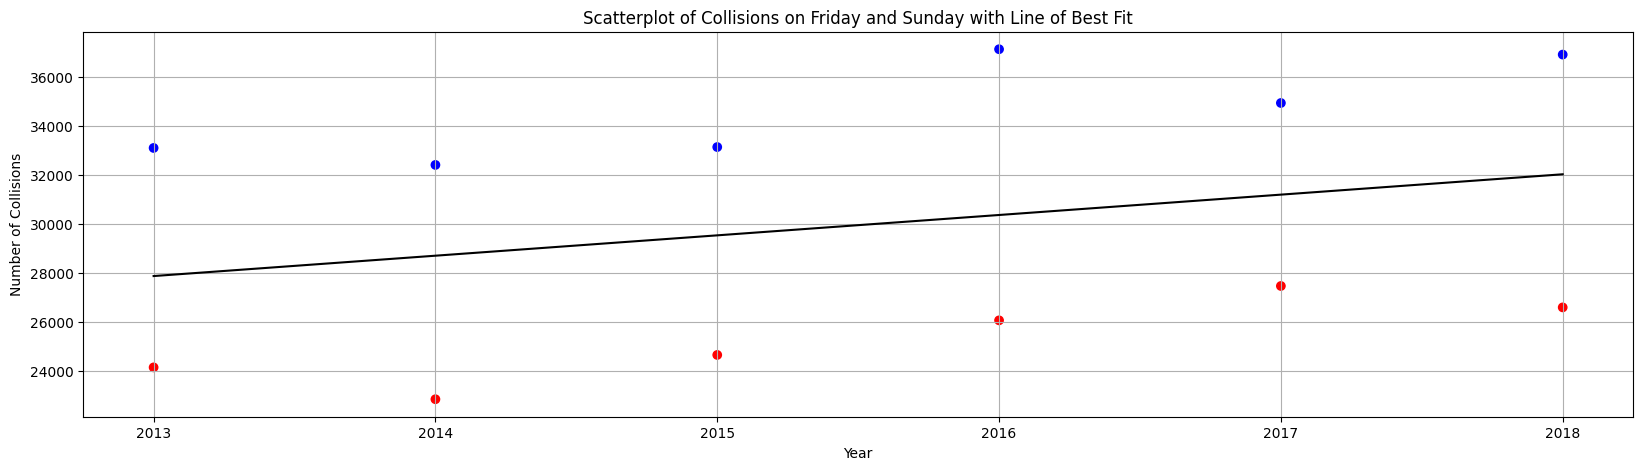

In [ ]:
# Interesting - let's look more closely at the data for Friday, across the years.

from sklearn.linear_model import LinearRegression

# Filter the data for Friday and Sunday
friday_sunday_data = collisions_per_day_per_year[(collisions_per_day_per_year['day_mapped'] == 'Friday') | (collisions_per_day_per_year['day_mapped'] == 'Sunday')]

# Create a scatterplot
plt.scatter(friday_sunday_data['year'], friday_sunday_data['NUM_COLLISIONS'], c=friday_sunday_data['day_mapped'].map({'Friday': 'blue', 'Sunday': 'red'}))

# Fit a linear regression model
model = LinearRegression()
model.fit(friday_sunday_data[['year']], friday_sunday_data['NUM_COLLISIONS'])

# Predict values using the model
predictions = model.predict(friday_sunday_data[['year']])

# Plot the line of best fit
plt.plot(friday_sunday_data['year'], predictions, color='black', linestyle='-')

# Create a custom legend
#plt.legend(['Line of Best Fit', 'Friday', 'Sunday'], loc='upper left')

plt.xlabel('Year')
plt.ylabel('Number of Collisions')
plt.title('Scatterplot of Collisions on Friday and Sunday with Line of Best Fit')
plt.grid(True)
plt.show()

## Narrative - interesting - the number of collisions on Friday increased between 2015 and 2016

In [ ]:
# Code to create a dataframe for each year

df_2012 = df_cleaned[df_cleaned["year"] == 2012] # no data
df_2013 = df_cleaned[df_cleaned["year"] == 2013]
df_2014 = df_cleaned[df_cleaned["year"] == 2014]
df_2015 = df_cleaned[df_cleaned["year"] == 2015]
df_2016 = df_cleaned[df_cleaned["year"] == 2016]
df_2017 = df_cleaned[df_cleaned["year"] == 2017]
df_2018 = df_cleaned[df_cleaned["year"] == 2018]

df_2013.describe()


print('2013', df_2013['day'].count())
print('2014', df_2014['day'].count())
print('2015', df_2015['day'].count())
print('2016', df_2016['day'].count())
print('2017', df_2017['day'].count())
print('2018', df_2018['day'].count())


2013 364
2014 359
2015 359
2016 364
2017 361
2018 362


In [ ]:
# Narrative - I am going to start with a simple table to show total collisions across year, by day

day_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
collisions_per_day_per_year['day'] = collisions_per_day_per_year['day'].map(day_mapping)
collisions_per_day_per_year_pivot = collisions_per_day_per_year.pivot_table(index='year', columns='day', values='collisions_count', fill_value=0)
print(collisions_per_day_per_year_pivot)





KeyError: 'day'

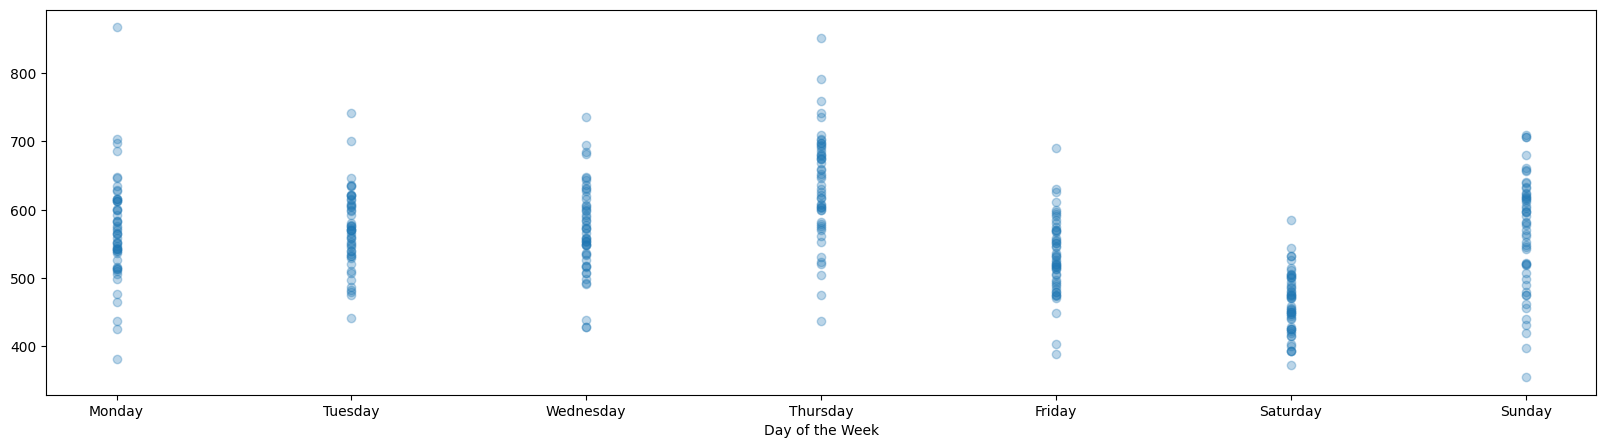

In [ ]:
#Creating a plot of 2013 data

day_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.scatter(df_2013['day'].map(lambda x: day_labels[x - 1]), df_2013['NUM_COLLISIONS'], alpha=0.3)
plt.xlabel('Day of the Week')
plt.show()



### Weekly differences ###

Here I am going to examine the weekly differences, or the collisions occuring per day

In [ ]:
# Assuming df_cleaned contains the necessary data

# Grouping data by day and summing up the collisions
total_collisions_per_day = df_cleaned.groupby('day')['NUM_COLLISIONS'].sum()

# Creating a DataFrame to represent the data
table_data = pd.DataFrame({
    'Day of the Week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'Total Collisions': total_collisions_per_day.values
})

# Displaying the table
print(table_data)

## Second table shows the data arranged from highest number of collisions to lowest number of collisions

total_collisions_per_day = df_cleaned.groupby('day')['NUM_COLLISIONS'].sum()

table_data = pd.DataFrame({
    'Day of the Week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'Total Collisions': total_collisions_per_day.values
})

table_data = table_data.sort_values(by='Total Collisions', ascending=False)

print(table_data)

# Narrative - clearly, as the second table shows, most collisions occur on a Friday, with least on a Sunday. Seems to make sense.
# Narrative - Correlations can explore this more.

  Day of the Week  Total Collisions
0          Monday            187203
1         Tuesday            194514
2       Wednesday            194134
3        Thursday            196751
4          Friday            207693
5        Saturday            175254
6          Sunday            151724
  Day of the Week  Total Collisions
4          Friday            207693
3        Thursday            196751
1         Tuesday            194514
2       Wednesday            194134
0          Monday            187203
5        Saturday            175254
6          Sunday            151724


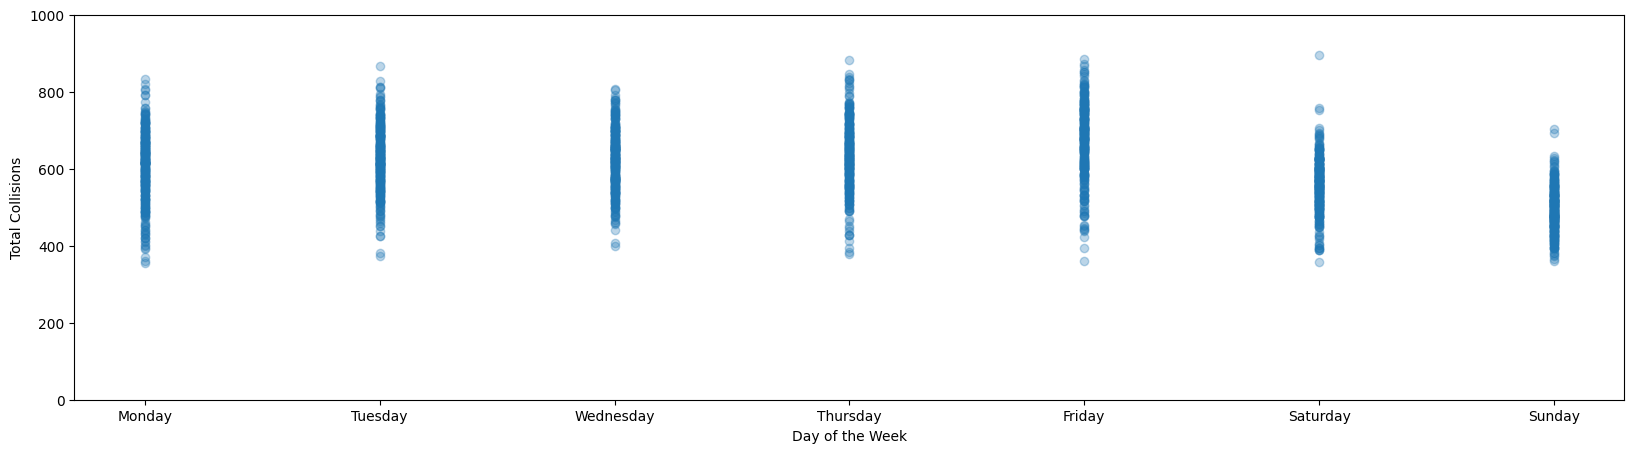

In [ ]:
# Narrative: This plit is just a simple way of showing the data in the tables.

import matplotlib.pyplot as plt

# Set the y-axis limit
plt.ylim(0, 1000)

# Define the day labels
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot the scatter plot
plt.scatter(df_cleaned.day, df_cleaned.NUM_COLLISIONS, alpha=0.3)

# Set the axis titles
plt.xlabel('Day of the Week')
plt.ylabel('Total Collisions')

# Set the x-axis tick labels
plt.xticks(range(1, 8), day_labels)

# Show the plot
plt.show()

#Narrative - the chart shows the same pattern as the tables above

In [ ]:
# do comparison of the cleaned data (df_cleaned) vs original data using plots


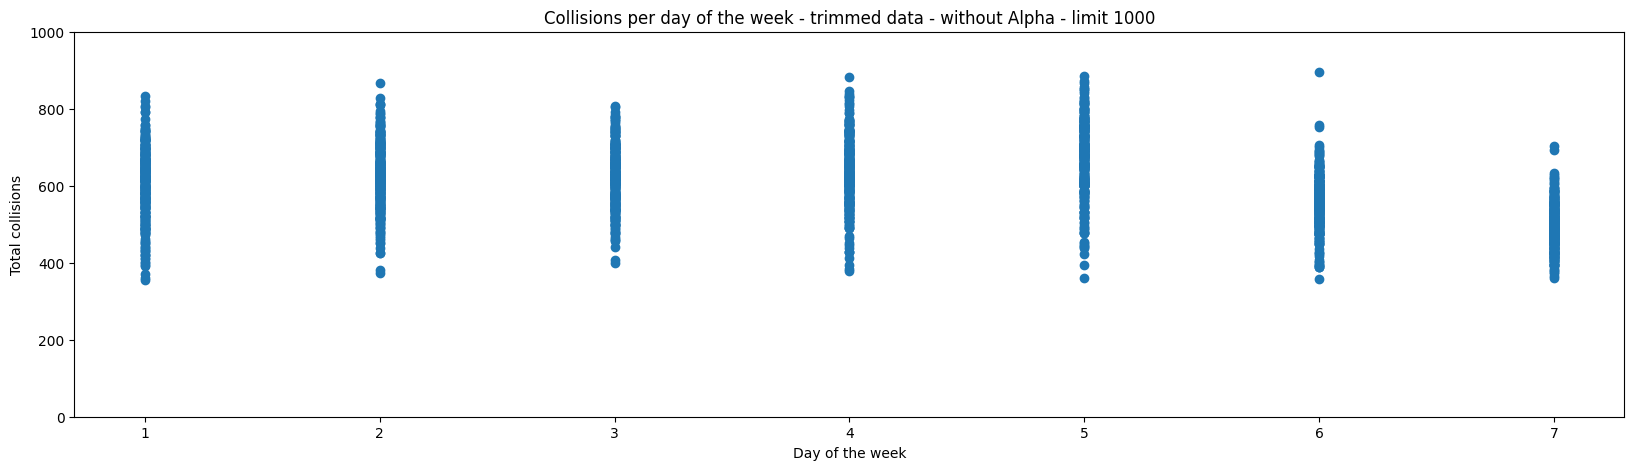

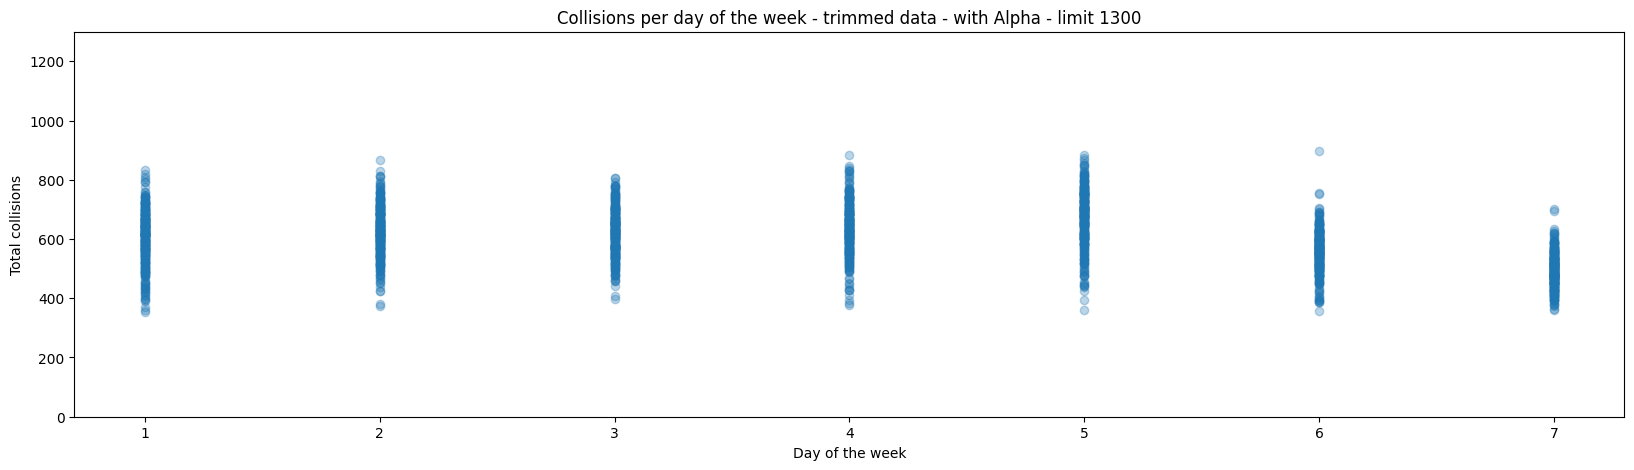

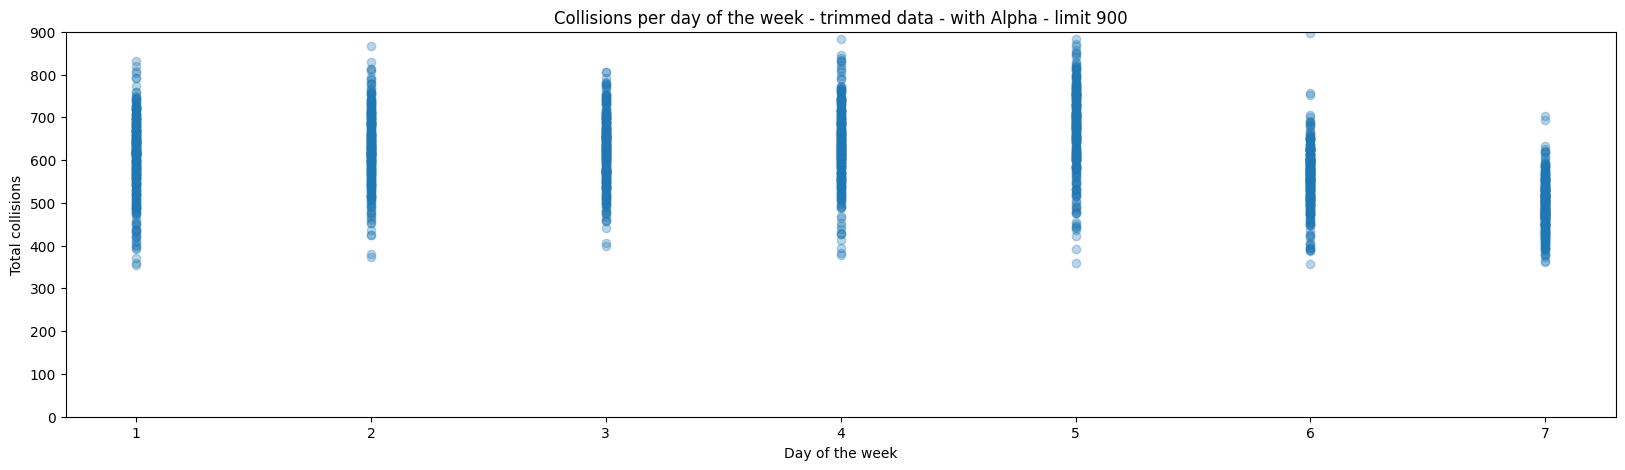

In [ ]:
#Code is examining the num collisions per week, with and without the alpha.

import matplotlib.pyplot as plt

# Set the y-axis limit for the first plot
plt.ylim(0, 1000)

# Plot the scatter plot for the first plot
plt.scatter(df_cleaned.day, df_cleaned.NUM_COLLISIONS)

# Set the axis titles for the first plot
plt.xlabel('Day of the Week (1 = Monday, 7 = Sunday)')
plt.ylabel('Total Collisions')

#Titles
plt.title('Collisions per day of the week - trimmed data - without Alpha - limit 1000')
plt.xlabel('Day of the week')
plt.ylabel('Total collisions')

# Show the first plot
plt.show()

### Second plot ###

# Set the y-axis limit for the second plot
plt.ylim(0, 1300)

# Plot the scatter plot for the second plot
plt.scatter(df_cleaned.day, df_cleaned.NUM_COLLISIONS, alpha=0.3)

# Set the title and axis titles for the second plot
plt.title('Collisions per day of the week - trimmed data - with Alpha - limit 1300')
plt.xlabel('Day of the week')
plt.ylabel('Total collisions')

# Show the second plot
plt.show()

#Narrative - not a huge difference observed when comparing the plots.

#In the final plot, I will adjust the alpha even lower

# Set the y-axis limit for the third plot
plt.ylim(0, 900)

# Plot the scatter plot for the third plot
plt.scatter(df_cleaned.day, df_cleaned.NUM_COLLISIONS, alpha=0.3)

# Set the title and axis titles for the third plot
plt.title('Collisions per day of the week - trimmed data - with Alpha - limit 900')
plt.xlabel('Day of the week')
plt.ylabel('Total collisions')

# Show the second plot
plt.show()

# Narrative - that didn't appear to make a huge amount of difference

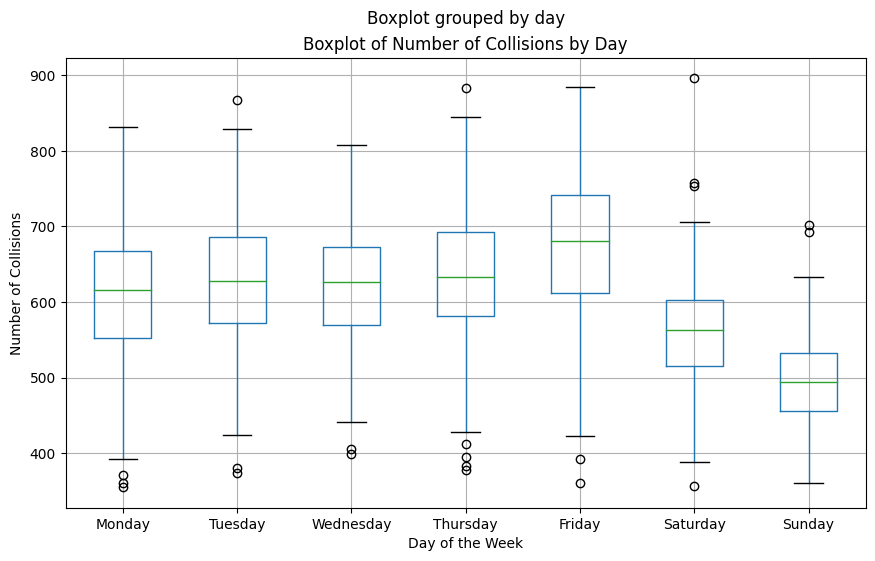

In [ ]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_cleaned.boxplot(column='NUM_COLLISIONS', by='day', grid=True, positions=range(7), figsize=(10,6))
plt.xticks(range(7), day_order)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Collisions')
plt.title('Boxplot of Number of Collisions by Day')
plt.show()

#Again, data shows the same thing - more collisions on Friday

### Summary ###

In [ ]:
### Summary###

### Narrative: Key findings thus far
# 1. More collisions happen on a Friday, compared to a Sunday, with a dip between 2015 and 2016
# 2. Data trimming does not appear to affect the trend


### Correlations of cleaned data ###

In [ ]:
#Next section will explore correlations of the cleaned data - all correlations, then trimmed correlations

corrMatrix = df_cleaned.corr()
# Creates correlation matrix which shows all the correlations we have
sn.heatmap(corrMatrix, annot=True)
#Makes a heatmap of the matrix
plt.show()
# Plots the above

# Narrative - Interesting correlation - negative correlation of collisions and day.
# cont. This means that, as the week progresses, the number of collisions decreases. This supports the pattern which is shown in the data. This is only a weak correlation however.
# The same finding is true of number of collisions and year - as time increases, so does the number of collisions

#Narrative - interesting correlations between weather data and number of collisions - certainly something to explore later.


NameError: name 'df_cleaned' is not defined

In [ ]:
#Narrative - ok now I am going to transform the data, so that Sunday becomes Monday and compare across

# Make a copy of the DataFrame to ensure you're working with the original
df_switched = df_cleaned.copy()

# Shift the days: Sunday becomes Monday
df_switched.loc[df_switched['day'] == 7, 'day'] = 1
df_switched.loc[df_switched['day'] < 7, 'day'] += 1

print("it worked")



In [ ]:
corrMatrix = df_switched.corr()
# Creates correlation matrix which shows all the correlations we have
sn.heatmap(corrMatrix, annot=True)
#Makes a heatmap of the matrix
plt.show()
# Plots the above

# Narrative - Interesting correlation.

#Narrative cont- there is now a very small but positive correlation between the number of collisions and the day and a stronger correlation between num of collisions and month

#Interestingly, there are several correlations between weather variables such as temp and dewp - further analysis will explore these


###Transforming days of the week###

## In next section, the *code* will explore what changing day of week does###

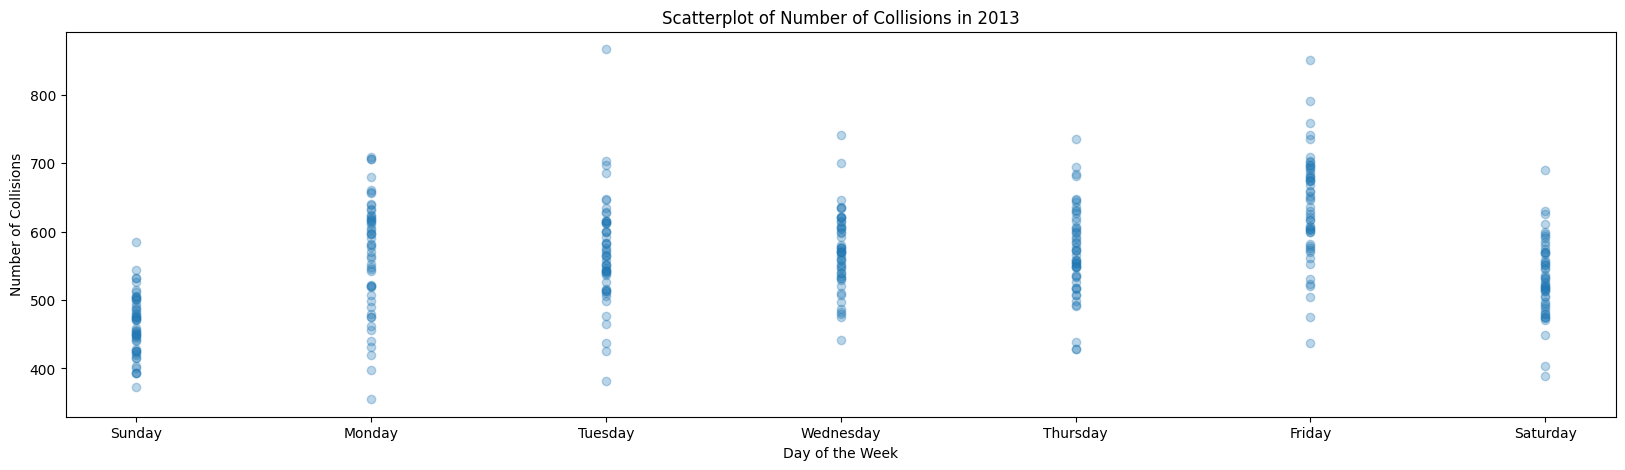

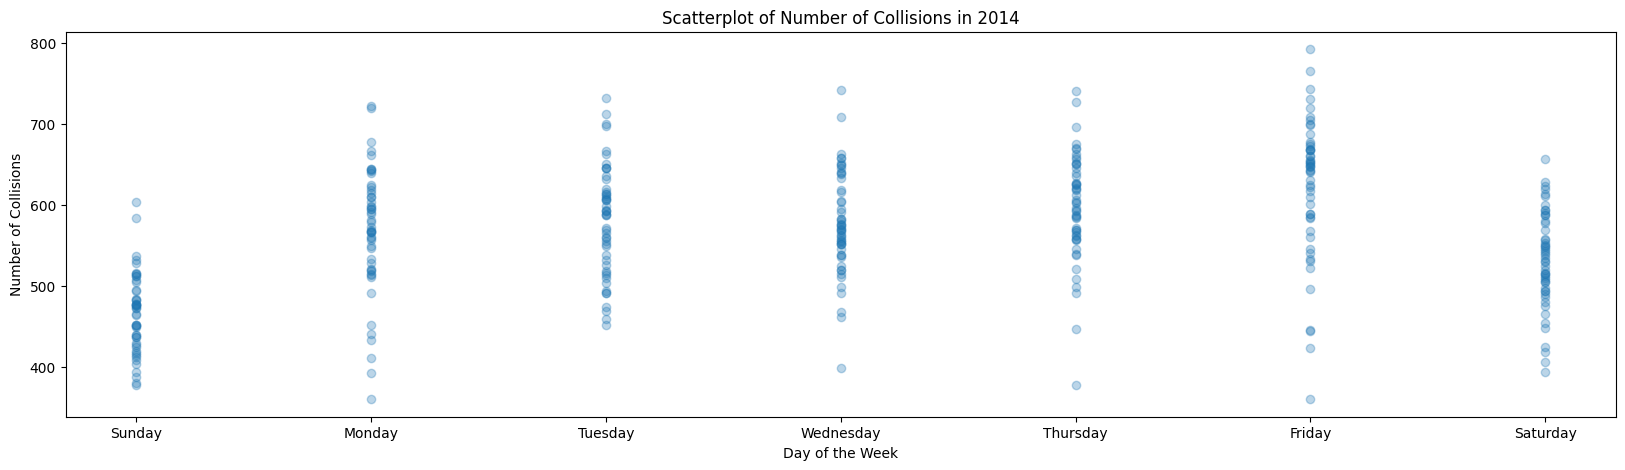

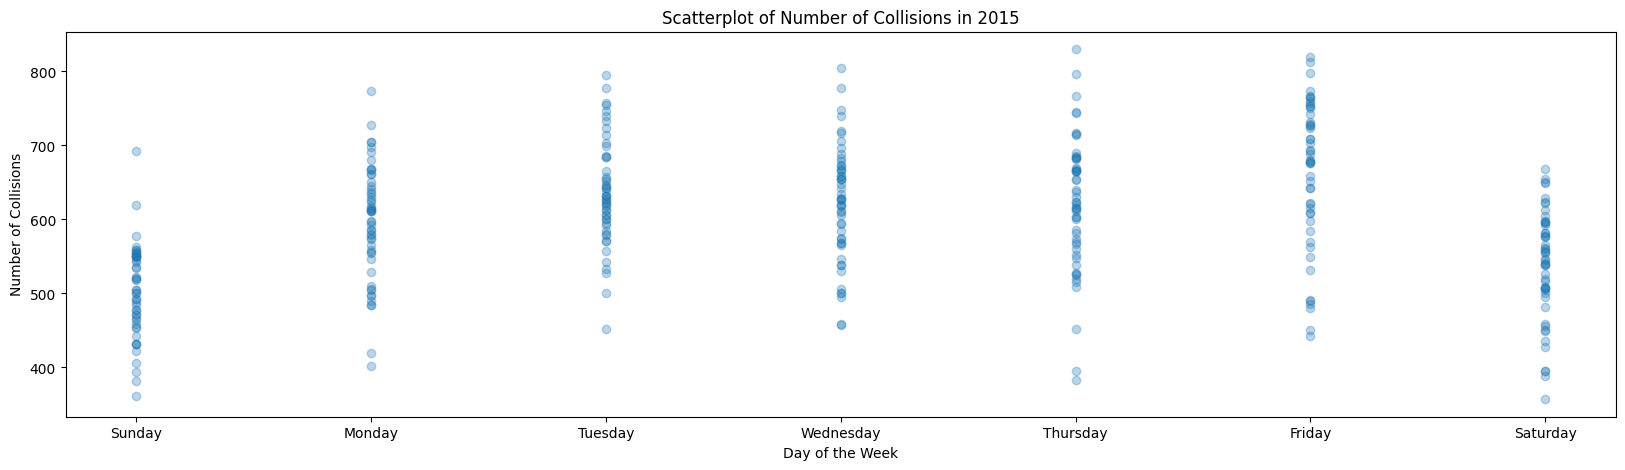

In [ ]:
##Transform the data, so that Sunday becomes Monday and compare across

df_2013_copy = df_2013.copy()  # Make a copy of the DataFrame to ensure you're working with the original
df_2013_copy.loc[df_2013_copy['day'] > 0, 'day'] = df_2013_copy['day'] + 1
df_2013_copy.loc[df_2013_copy['day'] == 8, 'day'] = 1

import matplotlib.pyplot as plt

day_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

plt.scatter(df_2013_copy['day'], df_2013_copy['NUM_COLLISIONS'], alpha=0.3)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Collisions')
plt.title('Scatterplot of Number of Collisions in 2013')
plt.xticks(range(1, 8), day_labels)
plt.show()

#now check the same data for 2014 and 2015

import matplotlib.pyplot as plt

# For 2014
df_2014_copy = df_2014.copy()  # Make a copy of the DataFrame to ensure you're working with the original
df_2014_copy.loc[df_2014_copy['day'] > 0, 'day'] = df_2014_copy['day'] + 1
df_2014_copy.loc[df_2014_copy['day'] == 8, 'day'] = 1

# Scatter plot for 2014
plt.scatter(df_2014_copy['day'], df_2014_copy['NUM_COLLISIONS'], alpha=0.3)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Collisions')
plt.title('Scatterplot of Number of Collisions in 2014')
plt.xticks(range(1, 8), day_labels)
plt.show()

# For 2015
df_2015_copy = df_2015.copy()  # Make a copy of the DataFrame to ensure you're working with the original
df_2015_copy.loc[df_2015_copy['day'] > 0, 'day'] = df_2015_copy['day'] + 1
df_2015_copy.loc[df_2015_copy['day'] == 8, 'day'] = 1

# Scatter plot for 2015
plt.scatter(df_2015_copy['day'], df_2015_copy['NUM_COLLISIONS'], alpha=0.3)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Collisions')
plt.title('Scatterplot of Number of Collisions in 2015')
plt.xticks(range(1, 8), day_labels)
plt.show()


<ipython-input-70-5d82e3b2e1b2>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df_2013_copy.corr()


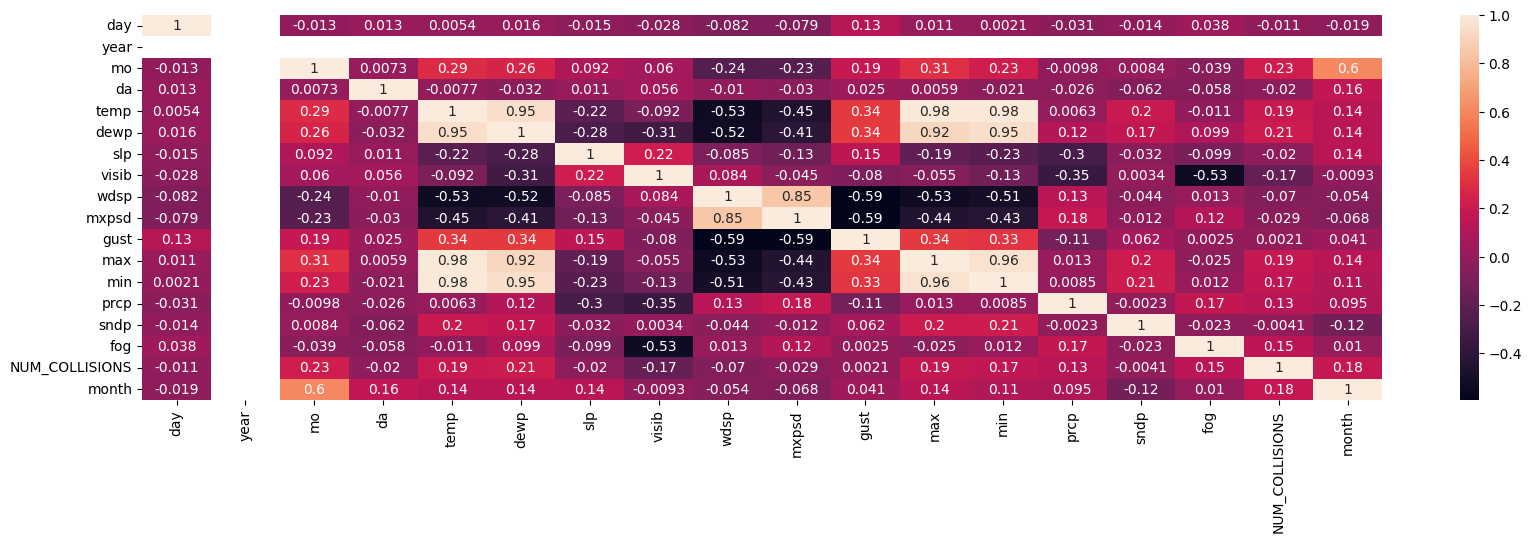

<ipython-input-70-5d82e3b2e1b2>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df_2014_copy.corr()


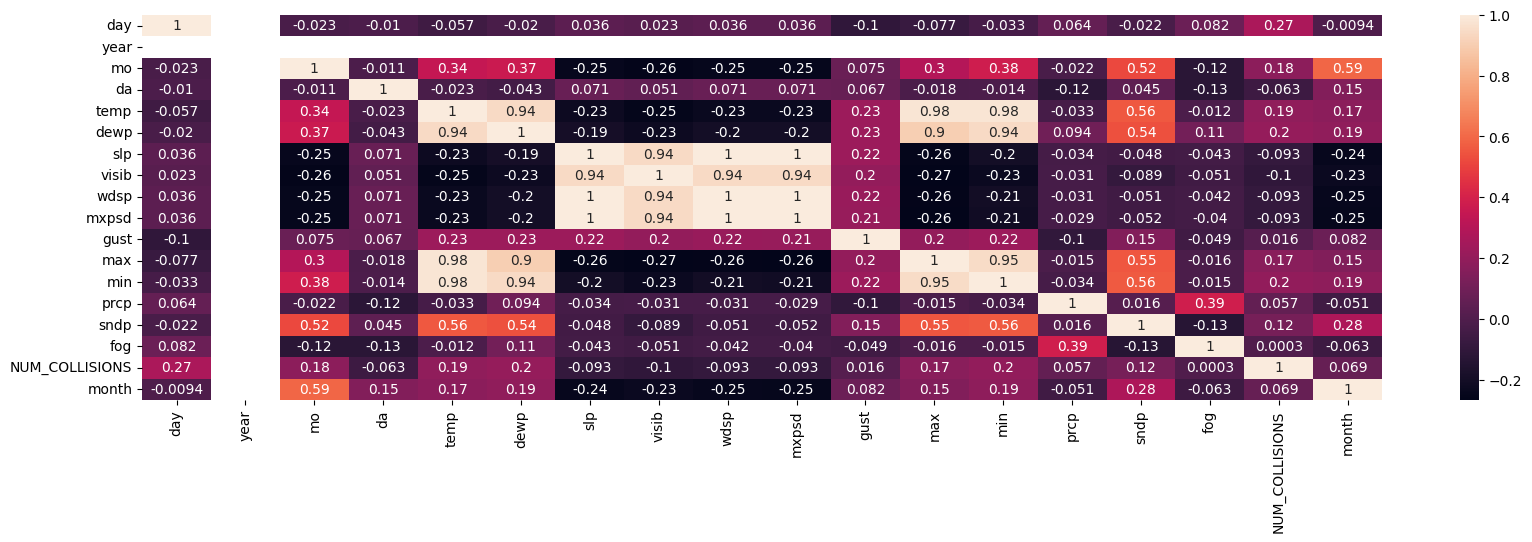

<ipython-input-70-5d82e3b2e1b2>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df_2015_copy.corr()


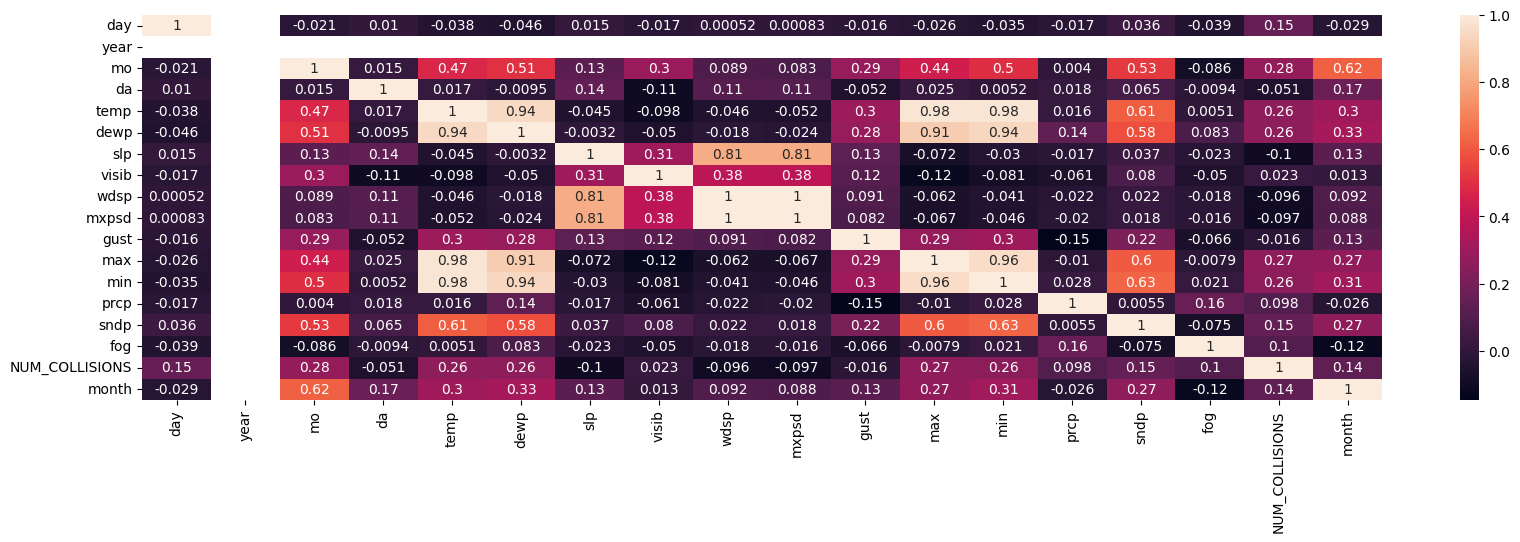

In [ ]:
#Next section will explore correlations of the cleaned data - all correlations, then trimmed correlations

#2013 data

corrMatrix = df_2013_copy.corr()
# Creates correlation matrix which shows all the correlations we have
sn.heatmap(corrMatrix, annot=True)
#Makes a heatmap of the matrix
plt.show()
# Plots the above

# 2014 data #

corrMatrix = df_2014_copy.corr()
# Creates correlation matrix which shows all the correlations we have
sn.heatmap(corrMatrix, annot=True)
#Makes a heatmap of the matrix
plt.show()
# Plots the above

# 2015 data #

corrMatrix = df_2015_copy.corr()
# Creates correlation matrix which shows all the correlations we have
sn.heatmap(corrMatrix, annot=True)
#Makes a heatmap of the matrix
plt.show()
# Plots the above

## Narrative

#Overall, no obvious correlations between number of collisions and year.


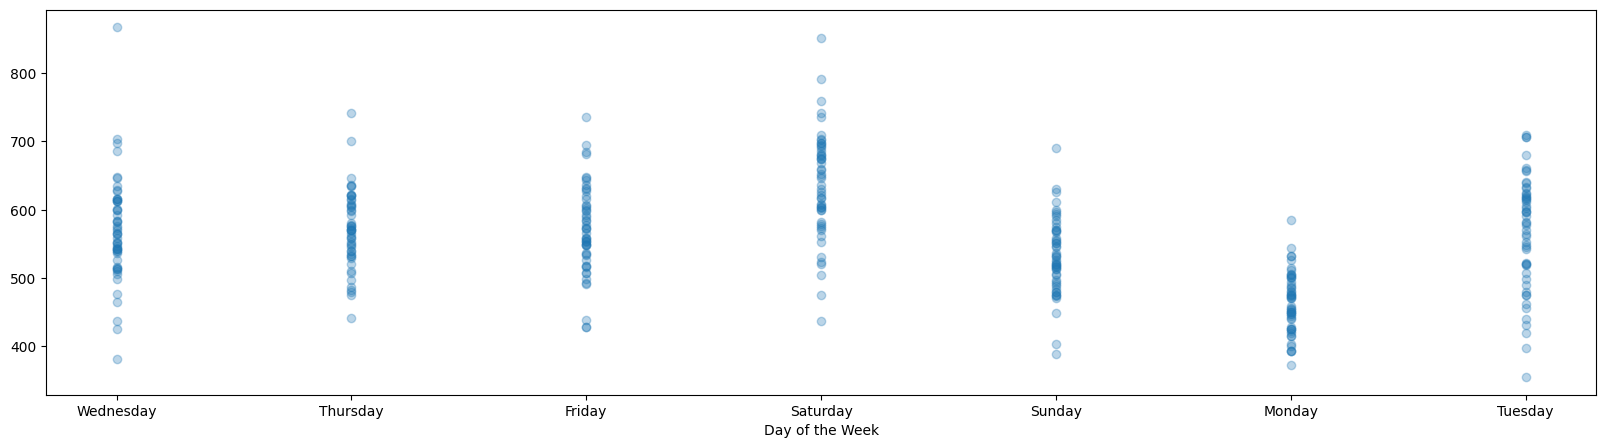

Data transformed


In [ ]:
#Timestamp 27 mins in

#Code to transform days of the week

df_2013_copy = df_2013.copy()  # Make a copy of the DataFrame to ensure you're working with the original

# Shift the days of the week
df_2013_copy.loc[df_2013_copy['day'] > 0, 'day'] = df_2013_copy['day'] + 2

# Handle the wrap-around for days that exceed 7
df_2013_copy['day'] = df_2013_copy['day'] % 7

# Check scatterplot of 2013 data
day_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.scatter(df_2013_copy['day'].map(lambda x: day_labels[x - 1]), df_2013_copy['NUM_COLLISIONS'], alpha=0.3)
plt.xlabel('Day of the Week')
plt.show()

print("Data transformed")



###Annual patterns###



In [ ]:
# Narrative - this section will explore seasonal and annual differences

#Temperature, max and min appeared to correlate so let's explore those

# As a reminder
#max – Maximum temperature reported during the day in Fahrenheit to tenths. (The time of the maximum temperature report varies by country and region so this will sometimes not be the maximum for the calendar day.) Missing = 9999.9.
#min – Minimum temperature reported during the day in Fahrenheit to tenths. (The time of the minimum temperature report varies by country and region so this will sometimes not be the minimum for the calendar day.) Missing = 9999.9.


In [ ]:
#Check data structure
df_2013.describe()


,day,year,mo,da,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS,month
count,364.000000,364.0,364.000000,364.000000,364.000000,364.000000,364.000000,364.00000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,3.997253,2013.0,6.510989,15.695055,55.140934,40.798901,1017.424725,8.88956,4.746154,9.679396,335.279396,63.687637,48.366484,0.135275,956.096154,0.093407,559.002747,6.510989
std,2.004813,0.0,3.445345,8.806952,17.210318,19.032799,6.929085,1.63328,1.953470,3.273222,458.069519,18.195307,16.621513,0.376109,204.569384,0.291402,81.872356,3.445345
min,1.000000,2013.0,1.000000,1.000000,14.400000,-5.400000,995.400000,3.20000,0.900000,4.100000,14.000000,19.900000,10.900000,0.000000,1.200000,0.000000,355.000000,1.000000
25%,2.000000,2013.0,4.000000,8.000000,39.975000,26.350000,1012.800000,8.00000,3.475000,7.000000,18.100000,48.000000,34.000000,0.000000,999.900000,0.000000,505.000000,4.000000
50%,4.000000,2013.0,7.000000,16.000000,57.150000,41.800000,1017.050000,9.80000,4.500000,8.900000,22.900000,66.000000,48.000000,0.000000,999.900000,0.000000,558.000000,7.000000
75%,6.000000,2013.0,9.250000,23.000000,70.925000,56.075000,1022.200000,10.00000,5.800000,11.325000,999.900000,80.325000,63.000000,0.050000,999.900000,0.000000,613.000000,9.250000
max,7.000000,2013.0,12.000000,31.000000,89.100000,72.800000,1039.100000,10.00000,10.900000,21.000000,999.900000,98.100000,82.900000,3.820000,999.900000,1.000000,867.000000,12.000000


In [ ]:
#First examine slp (Mean sea level pressure for the day in millibars to tenth)

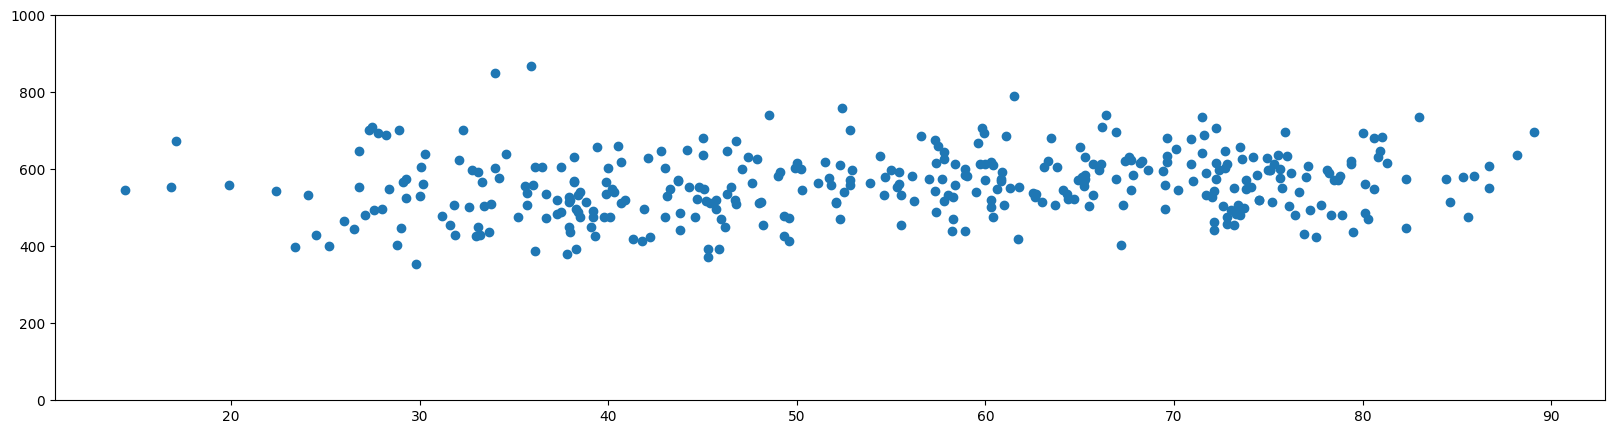

In [ ]:
#Narrative - let's first look at 2013 data

plt.ylim(0, 1000)
plt.scatter(df_2013.temp, df_2013.NUM_COLLISIONS)
plt.show()

### Create a new dataframe for regression analysis###

In [ ]:
df_2012 = df_cleaned[df_cleaned["year"] == 2012]
df_2012.loc[df_2012['day'] > 0, 'day'] = df_2012['day']+1 # change all days by adding 1.

df_2012.loc[df_2012['day'] == 8, 'day'] = 1 # change days that equal 8 to day 1

In [ ]:
# Filter data for the year 2013
df_2013 = df_cleaned[df_cleaned["year"] == 2013].copy()

# Increment all days by 1
df_2013.loc[df_2013['day'] > 0, 'day'] += 1

# Change days that are equal to 8 to 1
df_2013.loc[df_2013['day'] == 8, 'day'] = 1


# Filter data for the year 2014
df_2014 = df_cleaned[df_cleaned["year"] == 2014].copy()

# Increment all days by 1
df_2014.loc[df_2014['day'] > 0, 'day'] += 1

# Change days that are equal to 8 to 1
df_2014.loc[df_2014['day'] == 8, 'day'] = 1

# Filter data for the year 2015
df_2015 = df_cleaned[df_cleaned["year"] == 2015].copy()

# Increment all days by 1
df_2015.loc[df_2015['day'] > 0, 'day'] += 1

# Change days that are equal to 8 to 1
df_2015.loc[df_2015['day'] == 8, 'day'] = 1

# Filter data for the year 2016
df_2016 = df_cleaned[df_cleaned["year"] == 2016].copy()

# Increment all days by 1
df_2016.loc[df_2016['day'] > 0, 'day'] += 1

# Change days that are equal to 8 to 1
df_2016.loc[df_2016['day'] == 8, 'day'] = 1


In [ ]:
all_years = [df_2013, df_2014, df_2015, df_2016]
df_final = pd.concat(all_years)
print(df_final["day"].count())

df_final.head()
print ("ran this!")

df_final.describe()




1446
ran this!


,day,year,mo,da,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS,month
count,1446.000000,1446.00000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,4.018672,2014.50000,6.538036,15.736515,55.856570,40.460235,1141.416321,28.152420,16.337690,21.072752,344.061342,65.375864,48.035408,0.132801,910.673306,0.071231,587.784232,6.533195
std,1.995929,1.12151,3.429710,8.794879,17.562679,19.170412,1049.480490,136.606818,107.333302,106.841720,461.040350,18.307613,17.194228,0.350377,283.992694,0.257299,92.945349,3.433794
min,1.000000,2013.00000,1.000000,1.000000,9.800000,-11.800000,992.100000,1.700000,0.900000,4.100000,14.000000,17.600000,1.900000,0.000000,1.200000,0.000000,355.000000,1.000000
25%,2.000000,2013.00000,4.000000,8.000000,41.900000,26.225000,1012.700000,8.500000,3.300000,7.000000,18.100000,50.275000,35.100000,0.000000,999.900000,0.000000,521.000000,4.000000
50%,4.000000,2014.50000,7.000000,16.000000,57.700000,42.050000,1017.000000,9.800000,4.400000,8.900000,22.900000,66.900000,48.900000,0.000000,999.900000,0.000000,589.000000,7.000000
75%,6.000000,2016.00000,10.000000,23.000000,72.075000,56.375000,1021.875000,10.000000,5.800000,11.100000,999.900000,82.000000,64.000000,0.070000,999.900000,0.000000,650.000000,10.000000
max,7.000000,2016.00000,12.000000,31.000000,89.100000,74.800000,9999.900000,999.900000,999.900000,999.900000,999.900000,98.100000,82.900000,4.530000,999.900000,1.000000,872.000000,12.000000


In [ ]:
# Check if 'pickup_date' column exists
if 'pickup_date' in df_final.columns:
    # Convert 'pickup_date' to string data type
    df_final['pickup_date'] = df_final['pickup_date'].astype(str)

    # Create a new column with values the same as pickup_date
    df_final['pickup_date_no_year'] = df_final['pickup_date']

    # Remove year from the string for 2009 - 2013
    df_final['pickup_date_no_year'] = df_final['pickup_date_no_year'].str.replace('2009-', '')
    df_final['pickup_date_no_year'] = df_final['pickup_date_no_year'].str.replace('2010-', '')
    df_final['pickup_date_no_year'] = df_final['pickup_date_no_year'].str.replace('2011-', '')
    df_final['pickup_date_no_year'] = df_final['pickup_date_no_year'].str.replace('2012-', '')
    df_final['pickup_date_no_year'] = df_final['pickup_date_no_year'].str.replace('2013-', '')
else:
    print("Error: 'pickup_date' column does not exist in DataFrame.")


Error: 'pickup_date' column does not exist in DataFrame.


In [ ]:
df_final.describe()

,day,year,mo,da,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS,month
count,1446.000000,1446.00000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,4.018672,2014.50000,6.538036,15.736515,55.856570,40.460235,1141.416321,28.152420,16.337690,21.072752,344.061342,65.375864,48.035408,0.132801,910.673306,0.071231,587.784232,6.533195
std,1.995929,1.12151,3.429710,8.794879,17.562679,19.170412,1049.480490,136.606818,107.333302,106.841720,461.040350,18.307613,17.194228,0.350377,283.992694,0.257299,92.945349,3.433794
min,1.000000,2013.00000,1.000000,1.000000,9.800000,-11.800000,992.100000,1.700000,0.900000,4.100000,14.000000,17.600000,1.900000,0.000000,1.200000,0.000000,355.000000,1.000000
25%,2.000000,2013.00000,4.000000,8.000000,41.900000,26.225000,1012.700000,8.500000,3.300000,7.000000,18.100000,50.275000,35.100000,0.000000,999.900000,0.000000,521.000000,4.000000
50%,4.000000,2014.50000,7.000000,16.000000,57.700000,42.050000,1017.000000,9.800000,4.400000,8.900000,22.900000,66.900000,48.900000,0.000000,999.900000,0.000000,589.000000,7.000000
75%,6.000000,2016.00000,10.000000,23.000000,72.075000,56.375000,1021.875000,10.000000,5.800000,11.100000,999.900000,82.000000,64.000000,0.070000,999.900000,0.000000,650.000000,10.000000
max,7.000000,2016.00000,12.000000,31.000000,89.100000,74.800000,9999.900000,999.900000,999.900000,999.900000,999.900000,98.100000,82.900000,4.530000,999.900000,1.000000,872.000000,12.000000


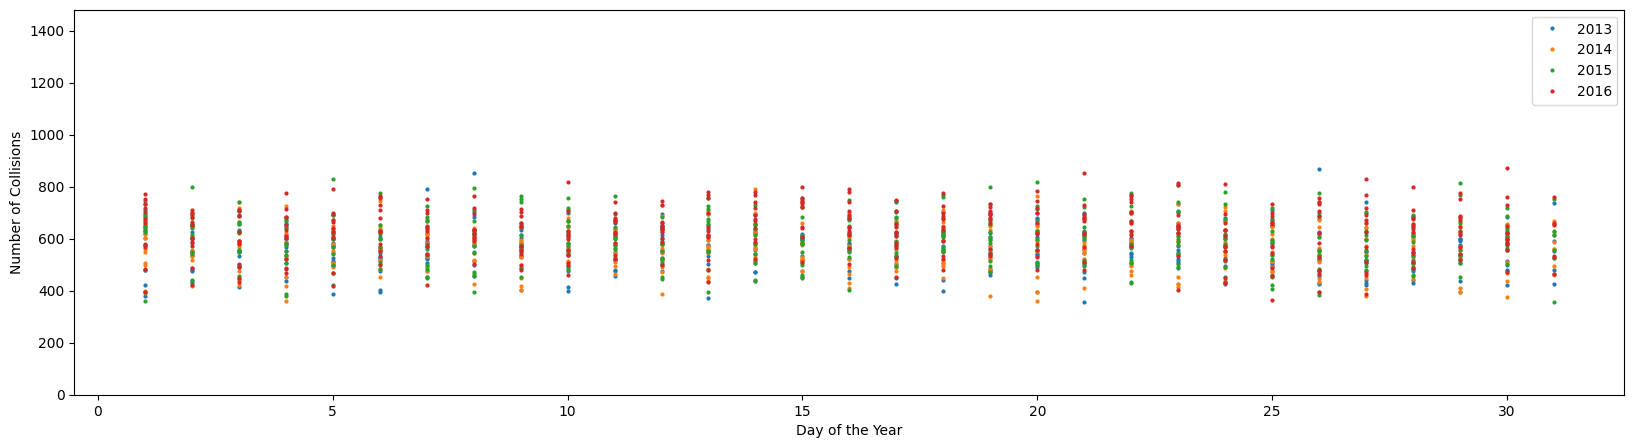

In [ ]:



# check out this plot
groups = df_final.groupby('year') # We group by year as we want to create a legend and make the visualization clearer using color.
plt.ylim(0, 1480)

for name, group in groups:
    plt.plot(group.da, group.NUM_COLLISIONS, marker='o', linestyle='', markersize=2, label=name)

plt.legend()

# Adding axis titles
plt.xlabel('Day of the Year')
plt.ylabel('Number of Collisions')

plt.show()


### Regression models###

In [ ]:
#Narrative - clearly temperature an important variable

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.15.0


In [ ]:
df_final_linear.isna().sum()
l
df_final_linear = df_final_linear.dropna()

li
#The second line removes all rows with any missing values from the DataFrame.

day               0
year              0
mo                0
da                0
collision_date    0
temp              0
dewp              0
slp               0
visib             0
wdsp              0
mxpsd             0
gust              0
max               0
min               0
prcp              0
sndp              0
fog               0
NUM_COLLISIONS    0
month             0
day_mapped        0
dtype: int64

In [ ]:
#Narrative - now I want to make a very simple model, with just one single input (days) and one output (NUM_COLLISIONS). So, let's create a dataframe.


In [ ]:
one_input_data = [df_final["day"], df_final["NUM_COLLISIONS"]] # create an array of all values for day and all values for NUM_TRIPS in two columns
headers = ["day", "NUM_COLLISIONS"] # declare the titles of our input and output. As you can see day is first and NUM_TRIPS is second and they correspond to the line above
df_one_input = pd.concat(one_input_data, axis=1, keys=headers) # Bring these two arrays together to make a new dataframe
df_one_input.head()

,day,NUM_COLLISIONS
0,3,381
1,4,480
2,5,549
3,6,505
4,7,389


In [ ]:
# ok now to train model

train_dataset = df_one_input.sample(frac=0.8, random_state=0)
test_dataset = df_one_input.drop(train_dataset.index)

In [ ]:
# now check it's all in there and working ok
train_dataset.describe()


,day,NUM_COLLISIONS
count,1157.000000,1157.000000
mean,3.994814,586.856525
std,1.996963,92.742613
min,1.000000,355.000000
25%,2.000000,519.000000
50%,4.000000,589.000000
75%,6.000000,649.000000
max,7.000000,872.000000


In [ ]:
test_dataset.describe()

,day,NUM_COLLISIONS
count,289.000000,289.000000
mean,4.114187,591.498270
std,1.992374,93.822384
min,1.000000,357.000000
25%,2.000000,526.000000
50%,4.000000,590.000000
75%,6.000000,653.000000
max,7.000000,867.000000


In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('NUM_COLLISIONS')
test_labels = test_features.pop('NUM_COLLISIONS')

In [ ]:
scale_factor = 1000000

In [ ]:
train_labels = train_labels/scale_factor
test_labels = test_labels/scale_factor

In [ ]:
print(train_labels)

1096    0.000422
482     0.000597
184     0.000438
302     0.000558
995     0.000501
          ...   
460     0.000484
589     0.000572
147     0.000686
160     0.000624
1124    0.000596
Name: NUM_COLLISIONS, Length: 1157, dtype: float64


Here is our process for linear regression with one input value (day) and one output value (NUM_TRIPS).

Training a model with tf.keras typically starts by defining the model architecture. We will use a tf.keras.Sequential model which represents a sequence of steps.

There are two steps in your single-variable linear regression model:

    Normalise the 'day' input features using the tf.keras.layers.Normalization preprocessing layer.
    Apply a linear transformation (y = mx + c) to produce one output using a linear layer (tf.keras.layers.Dense).

The number of inputs can either be set by the input_shape argument, or automatically when the model is run for the first time.

First, we create a NumPy array made of the 'day' features. Then, instantiate the tf.keras.layers.Normalization and fit its state to the day data.

I mentioned earlier that we want to normalise our features (the input variables

In [ ]:
import tensorflow as tf
import numpy as np

# Assuming train_features is your training data
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

first = np.array(train_features[:1])

# Print the first example before and after normalization
with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())


First example: [[7]]

Normalized: [[1.51]]


In [ ]:
import tensorflow as tf
import numpy as np

# Assuming train_features is your DataFrame and 'day' is one of its columns
day = np.array(train_features['day'])

# Define and adapt the Normalization layer
day_normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
day_normalizer.adapt(day)


In [ ]:
import tensorflow as tf
import numpy as np

# Assuming day_normalizer is already defined as in your previous code
# Define the model
day_model = tf.keras.Sequential([
    day_normalizer,
    tf.keras.layers.Dense(units=1)  # accessing Dense layer through tf.keras.layers
])

# Print model summary
day_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5 (24.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [ ]:
day_model.predict(day[:10])

1/1 [==============================] - 0s 383ms/step


array([[ 0.23866849],
       [-0.15842606],
       [ 0.07983068],
       [ 0.00041176],
       [ 0.00041176],
       [ 0.00041176],
       [-0.07900716],
       [ 0.15924957],
       [-0.07900716],
       [ 0.23866849]], dtype=float32)

In [ ]:
day_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

print("It worked")

It worked


Next we will use Keras model.fit to execute the training for 100 epochs.

    List item
    List item


In [ ]:
%%time
history = day_model.fit(
    train_features['day'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 9.95 s, sys: 374 ms, total: 10.3 s
Wall time: 11.1 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.020868,0.012767,95
96,0.022209,0.020185,96
97,0.016666,0.012821,97
98,0.013479,0.010738,98
99,0.014193,0.021868,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.2])
  plt.xlabel('Epoch')
  plt.ylabel('Error [NUM_TRIPS]')
  plt.legend()
  plt.grid(True)

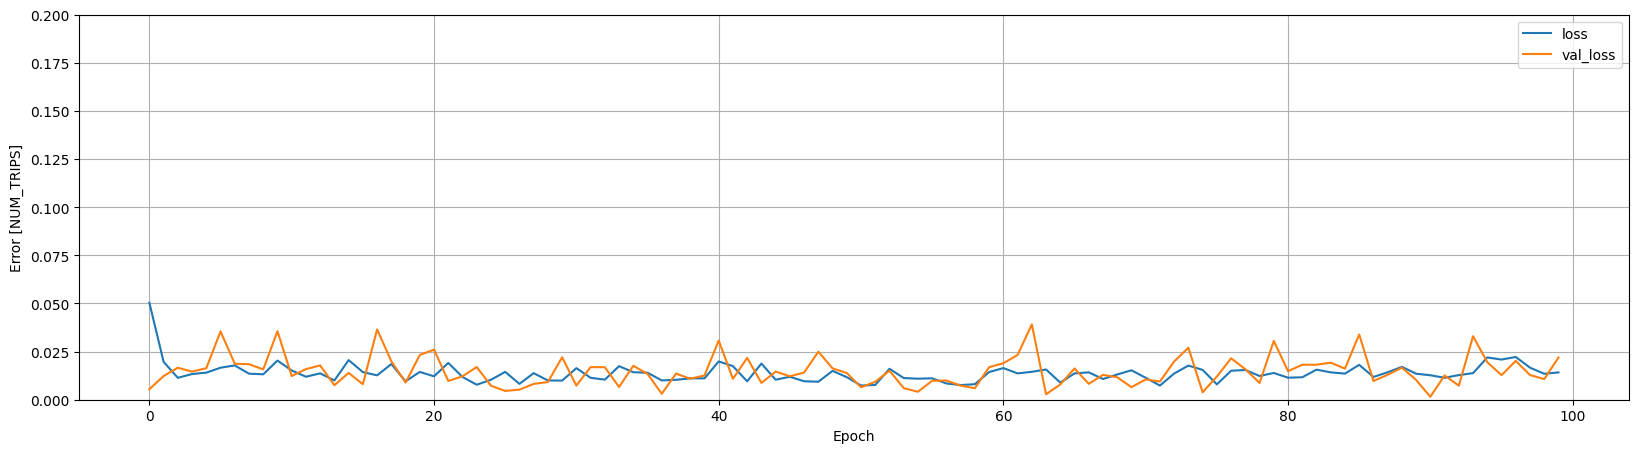

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}

test_results['day_model'] = day_model.evaluate(
    test_features['day'],
    test_labels, verbose=0)

In [ ]:
x = tf.linspace(1, 7, 8)
y = day_model.predict(x)

1/1 [==============================] - 0s 35ms/step


In [ ]:
def plot_day(x, y):
  plt.scatter(train_features['day'], train_labels, label='Data', alpha=0.3)
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('day')
  plt.ylim([0.2, 0.8])
  plt.ylabel('NUM_TRIPS')
  plt.legend()

  plot_day(x, y)

In [ ]:
## Looking good, let's try a linear regression model

In [ ]:
many_input_data = [df_final["day"], df_final["temp"], df_final["NUM_COLLISIONS"]] # create an array of all values for day and all values for NUM_TRIPS in two columns
headers = ["day", "temp", "NUM_COLLISIONS"] # declare the titles of our input and output. As you can see day is first and NUM_TRIPS is second and these correspond to the line above
df_many_input = pd.concat(many_input_data, axis=1, keys=headers) # Bring these two arrays together to make a new dataframe
df_many_input.head()

,day,temp,NUM_COLLISIONS
0,3,37.8,381
1,4,27.1,480
2,5,28.4,549
3,6,33.4,505
4,7,36.1,389


In [ ]:
train_dataset = df_many_input.sample(frac=0.8, random_state=0)
test_dataset = df_many_input.drop(train_dataset.index)

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('NUM_COLLISIONS')
test_labels = test_features.pop('NUM_COLLISIONS')

In [ ]:
train_features.head()

,day,temp
1096,7,35.8
482,2,54.5
184,5,79.5
302,4,52.8
995,4,68.4


In [ ]:
train_labels = train_labels/scale_factor
test_labels = test_labels/scale_factor

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[ 7.  35.8]]

Normalized: [[ 1.51 -1.15]]


In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [ ]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 95ms/step


array([[ 2.7997324 ],
       [-1.2560704 ],
       [-0.31554586],
       [ 0.12800418],
       [-0.51501447],
       [-1.0755948 ],
       [-0.6155571 ],
       [ 1.0792776 ],
       [-1.4894028 ],
       [ 2.9893403 ]], dtype=float32)

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 1.3114396 ],
       [-0.71501553]], dtype=float32)>

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 10.7 s, sys: 413 ms, total: 11.1 s
Wall time: 21.4 s


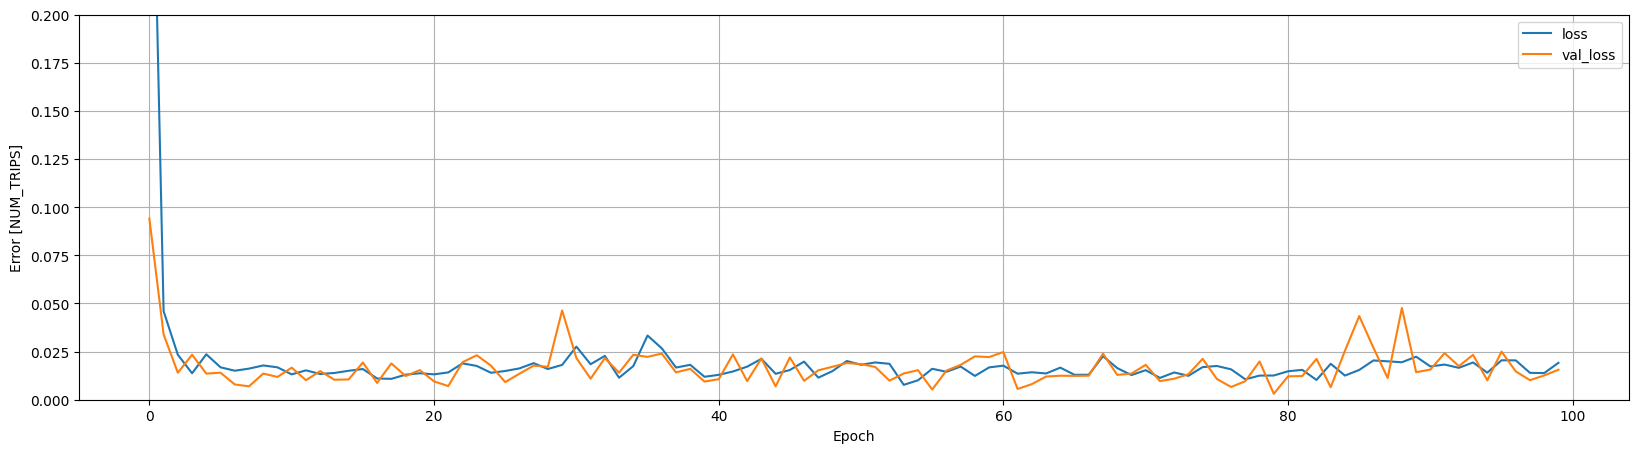

In [ ]:
plot_loss(history)

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [NUM_COLLISIONS]']).T

,Mean absolute error [NUM_COLLISIONS]
day_model,0.023501
linear_model,0.017191


In [ ]:
#Very interesting - day model is better overall, as MSE is lower

In [ ]:
###DNN Model###

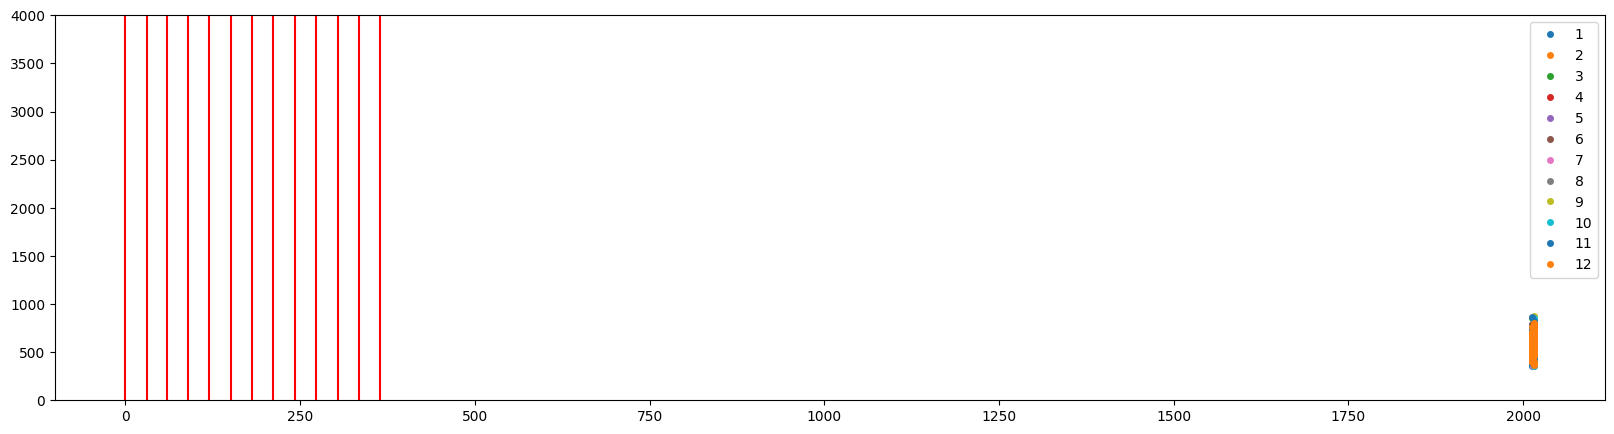

In [ ]:
groups = df_final.groupby('mo') # We group by month as we want to create a legend and make the visualisation clearer using colour.
fig, ax = plt.subplots();
plt.ylim(0, 4000)
for name, group in groups:
    plt.plot(group.year, group.NUM_COLLISIONS, marker='o', linestyle='', markersize=4, label=name)

plt.legend()
ax.axvline(x=0, ymin=0.0, ymax=1.0, color='r')
ax.axvline(x=31, ymin=0.0, ymax=1.0, color='r')
ax.axvline(x=59, ymin=0.0, ymax=1.0, color='r')
ax.axvline(x=90, ymin=0.0, ymax=1.0, color='r')
ax.axvline(x=120, ymin=0.0, ymax=1.0, color='r')
ax.axvline(x=151, ymin=0.0, ymax=1.0, color='r')
ax.axvline(x=181, ymin=0.0, ymax=1.0, color='r')
ax.axvline(x=212, ymin=0.0, ymax=1.0, color='r')
ax.axvline(x=243, ymin=0.0, ymax=1.0, color='r')
ax.axvline(x=273, ymin=0.0, ymax=1.0, color='r')
ax.axvline(x=304, ymin=0.0, ymax=1.0, color='r')
ax.axvline(x=334, ymin=0.0, ymax=1.0, color='r')
ax.axvline(x=365, ymin=0.0, ymax=1.0, color='r')

In [ ]:
#Examine March

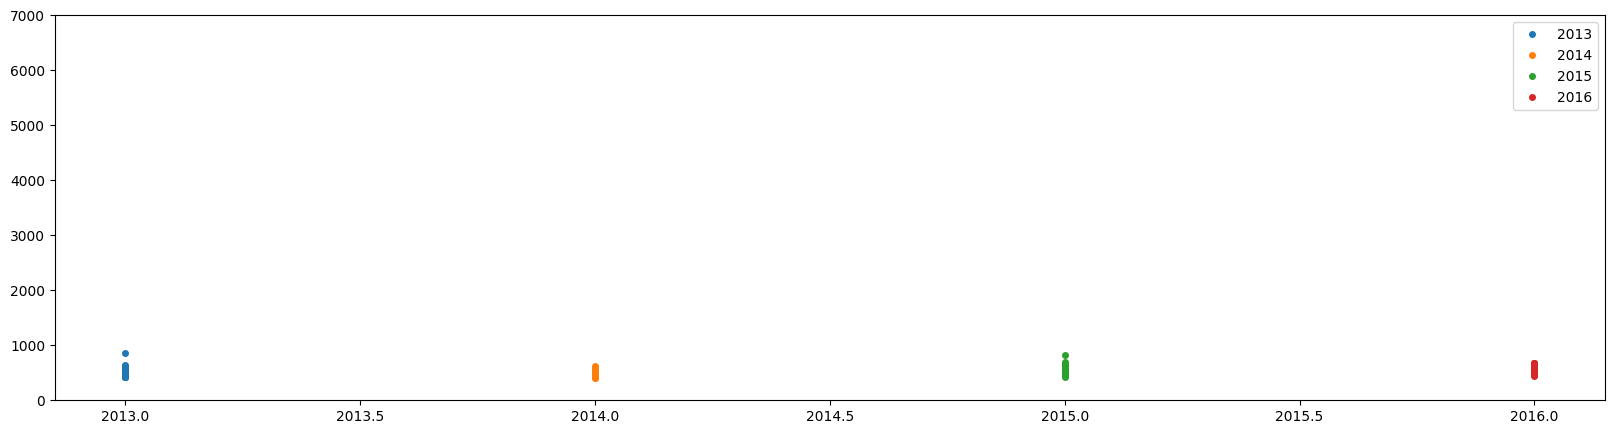

In [ ]:
df_final_march = df_final[df_final["mo"] == 3]
groups = df_final_march.groupby('year') # We group by year as we want to create a legend and make the visualisation clearer using colour.
plt.ylim(0, 7000)
for name, group in groups:
    plt.plot(group.year, group.NUM_COLLISIONS, marker='o', linestyle='', markersize=4, label=name)

plt.legend()

<ipython-input-192-53deeb27cfd7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df_final_march.corr()


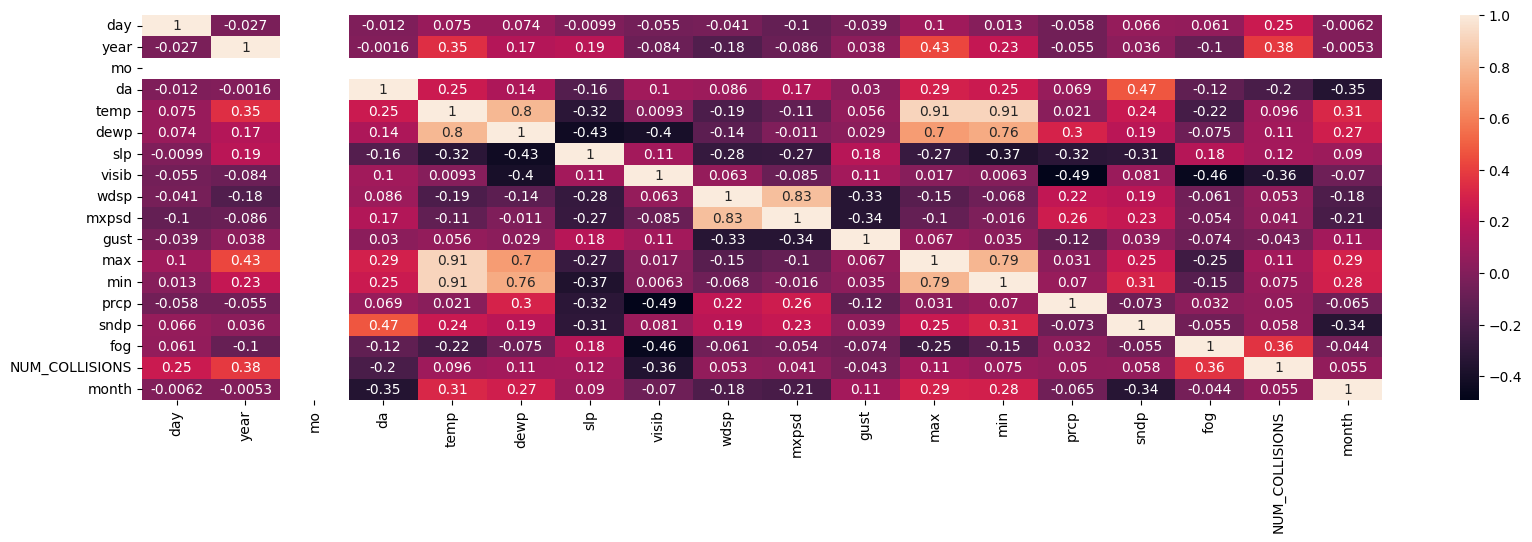

In [ ]:
corrMatrix = df_final_march.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
#add one hot encoding
df_final.head()

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS,month,day_mapped
0,3,2013,1,1,2013-01-01,37.8,23.6,1011.9,10.0,6.1,8.9,19.0,39.9,33.1,0.0,999.9,0,381,1,Tuesday
1,4,2013,1,2,2013-02-01,27.1,10.5,1016.8,10.0,5.3,9.9,19.0,33.1,21.9,0.0,999.9,0,480,2,Wednesday
2,5,2013,1,3,2013-03-01,28.4,14.1,1020.6,10.0,3.7,8.0,15.0,32.0,24.1,0.0,999.9,0,549,3,Thursday
3,6,2013,1,4,2013-04-01,33.4,18.6,1017.0,10.0,6.5,13.0,24.1,37.0,30.0,0.0,999.9,0,505,4,Friday
4,7,2013,1,5,2013-05-01,36.1,18.7,1020.6,10.0,6.6,12.0,21.0,42.1,32.0,0.0,999.9,0,389,5,Saturday


In [ ]:
# One-Hot Encoding for day
df_final['da'] = df_final['da'].map({ 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'})
df_final = pd.get_dummies(df_final, columns=['da'], prefix='', prefix_sep='')

In [ ]:
# One-Hot Encoding for month
df_final['mo'] = df_final['mo'].map({ 1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
df_final = pd.get_dummies(df_final, columns=['mo'], prefix='', prefix_sep='')


In [ ]:
df_final.head()

,year,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,...,November,October,September,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2013,2013-01-01,37.8,23.6,1011.9,10.0,6.1,8.9,19.0,39.9,...,0,0,0,0,0,0,1,0,0,0
1,2013,2013-02-01,27.1,10.5,1016.8,10.0,5.3,9.9,19.0,33.1,...,0,0,0,0,1,0,0,0,0,0
2,2013,2013-03-01,28.4,14.1,1020.6,10.0,3.7,8.0,15.0,32.0,...,0,0,0,0,0,0,0,0,1,0
3,2013,2013-04-01,33.4,18.6,1017.0,10.0,6.5,13.0,24.1,37.0,...,0,0,0,0,0,0,0,0,0,1
4,2013,2013-05-01,36.1,18.7,1020.6,10.0,6.6,12.0,21.0,42.1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
dnn_many_input_data = [df_final["year"], df_final["temp"], df_final["dewp"], df_final["slp"], df_final["visib"], df_final["wdsp"], df_final["gust"], df_final["prcp"], df_final["sndp"], df_final["fog"], df_final["Sunday"], df_final["Monday"], df_final["Tuesday"], df_final["Wednesday"], df_final["Thursday"], df_final["Friday"], df_final["Saturday"], df_final["January"], df_final["February"], df_final["March"], df_final["April"], df_final["May"], df_final["June"], df_final["July"], df_final["August"], df_final["September"], df_final["October"], df_final["November"], df_final["December"], df_final["NUM_COLLISIONS"]]
headers = ["year","temp","dewp","slp","visib","wdsp","gust","prcp","sndp","fog","Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","January","February","March","April","May","June","July","August","September","October","November","December","NUM_TRIPS"]
df_dnn_many_input = pd.concat(dnn_many_input_data, axis=1, keys=headers)
df_dnn_many_input.head()

,year,temp,dewp,slp,visib,wdsp,gust,prcp,sndp,fog,...,April,May,June,July,August,September,October,November,December,NUM_TRIPS
,year,temp,dewp,slp,visib,wdsp,gust,prcp,sndp,fog,...,April,May,June,July,August,September,October,November,December,NUM_COLLISIONS
0,2013,37.8,23.6,1011.9,10.0,6.1,19.0,0.0,999.9,0,...,0,0,0,0,0,0,0,0,0,381
1,2013,27.1,10.5,1016.8,10.0,5.3,19.0,0.0,999.9,0,...,0,0,0,0,0,0,0,0,0,480
2,2013,28.4,14.1,1020.6,10.0,3.7,15.0,0.0,999.9,0,...,0,0,0,0,0,0,0,0,0,549
3,2013,33.4,18.6,1017.0,10.0,6.5,24.1,0.0,999.9,0,...,0,0,0,0,0,0,0,0,0,505
4,2013,36.1,18.7,1020.6,10.0,6.6,21.0,0.0,999.9,0,...,0,0,0,0,0,0,0,0,0,389


In [ ]:
train_dataset = df_dnn_many_input.sample(frac=0.8, random_state=0)
test_dataset = df_dnn_many_input.drop(train_dataset.index)

***Hit error from here onwards***

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('NUM_COLLISIONS')
test_labels = test_features.pop('NUM_COLLISIONS')

#Hit error here


KeyError: 'NUM_COLLISIONS'

In [ ]:
# Scale labels

train_labels = train_labels/scale_factor
test_labels = test_labels/scale_factor

In [ ]:
# put model into function

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
#normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

In [ ]:
#Then make model

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

In [ ]:
#train model
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

In [ ]:
plot_loss(history)

In [ ]:
#Store results

test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [NUM_TRIPS]']).T

# Module 5: Using the outcomes

In this section you want to use the test data to test what kind of money you will potentially make.

Your company rents cars daily to people in New York City and is struggling in a saturated market. You have noted that you offer a flat rate damage waiver insurance package to all customers and that most customers chose not to take it. This package is something that has the potential to make the company lots of money if marketed properly.

At the moment you offer the package for a fee of 30 dollars per day, with only around 30% of all customers taking it. You rent on average 20,000 vehicles per day and therefore this package makes the company 180,000 dollars. The damage caused by collisions costs on average 500 dollars per collision with 8% of customers encountering a collision of some kind resulting in damage. The total costs from damage come to 800,000 dollars, which is covered by the customers' insurance, but around 10% of this is covered by the company due to fradulent behaviour or customers taking the waiver. This results in a profit of around 100,000 dollars per day for the sale of this package alone.

This 30 dollars is based on an expected 1,200 collisions per day (based on the maximum).

The goal of this investigation is to accurately predict the number of expected collisions on a given day in order to reduce the price of the on-demand package and therefore give value to the customer. Surveys have shown that a competitive price would result in 80% of respondents taking the damage waiver insurance option – but the price must reflect the associated costs.

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

# Ignore the line under here, this is to suppress a warning
pd.options.mode.chained_assignment = None

In [ ]:
# Link with your google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df_2019_test_data = pd.read_csv('/content/gdrive/MyDrive/LBD_testdata2019.csv')

In [ ]:
df_2019_test_data = df_2019_test_data.sort_values(["year", "mo", "da"], ascending = (True, True, True))

In [ ]:
df_2019_test_data.head()

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
0,2,2019,1,1,01/01/2019,50.5,43.2,1009.8,7.0,999.9,999.9,999.9,57.9,36.0,1.08,999.9,0,430
1,3,2019,1,2,02/01/2019,38.0,23.2,1024.2,10.0,999.9,999.9,999.9,57.9,35.1,0.06,999.9,0,502
2,4,2019,1,3,03/01/2019,41.1,29.4,1015.8,9.9,999.9,999.9,999.9,44.1,35.1,0.00,999.9,0,504
3,5,2019,1,4,04/01/2019,39.7,26.4,1014.8,9.9,999.9,999.9,999.9,46.0,35.1,0.00,999.9,0,598
4,6,2019,1,5,05/01/2019,44.2,41.0,1003.3,5.3,999.9,999.9,999.9,46.9,35.1,0.22,999.9,0,455


In [ ]:
linear_day_predictions = day_model.predict(df_2019_test_data["day"][:90])*scale_factor
linear_day_predictions #

3/3 [==============================] - 0s 7ms/step


array([[ 2236.738801  ],
       [11691.27877802],
       [21145.81875503],
       [30600.35780072],
       [40054.89498377],
       [49509.43589211],
       [-7217.79838204],
       [ 2236.738801  ],
       [11691.27877802],
       [21145.81875503],
       [30600.35780072],
       [40054.89498377],
       [49509.43589211],
       [-7217.79838204],
       [ 2236.738801  ],
       [11691.27877802],
       [21145.81875503],
       [30600.35780072],
       [40054.89498377],
       [49509.43589211],
       [-7217.79838204],
       [ 2236.738801  ],
       [11691.27877802],
       [21145.81875503],
       [30600.35780072],
       [40054.89498377],
       [49509.43589211],
       [-7217.79838204],
       [ 2236.738801  ],
       [11691.27877802],
       [21145.81875503],
       [30600.35780072],
       [40054.89498377],
       [49509.43589211],
       [-7217.79838204],
       [ 2236.738801  ],
       [11691.27877802],
       [21145.81875503],
       [30600.35780072],
       [40054.89498377],


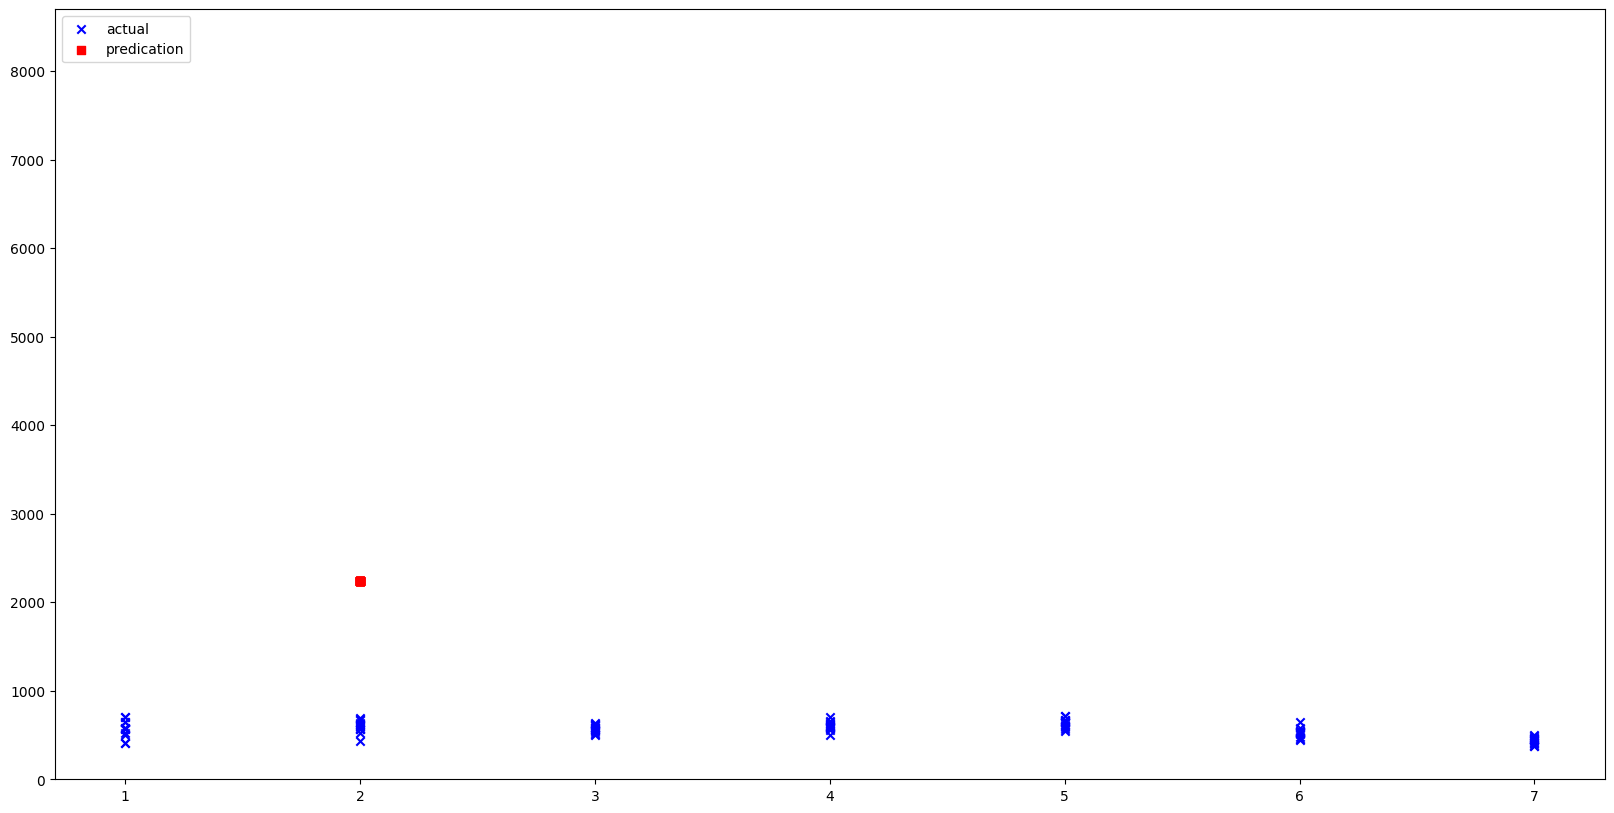

In [ ]:
#error on pickup data, so used day

plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(df_2019_test_data["day"][:90], df_2019_test_data["NUM_COLLISIONS"][:90], c='b', marker='x', label='actual')
plt.scatter(df_2019_test_data["day"][:90], linear_day_predictions[:90], c='r', marker='s', label='predication')
plt.ylim(0, 8700)
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Shows somewhat linear increase day by day

In [ ]:
input_data_multi_linear = [df_2019_test_data["day"][:90], df_2019_test_data["temp"][:90]]
headers = ["day","temp"]
df_input_data_multi_linear = pd.concat(input_data_multi_linear, axis=1, keys=headers)
df_input_data_multi_linear

,day,temp
0,2,50.5
1,3,38.0
2,4,41.1
3,5,39.7
4,6,44.2
...,...,...
85,3,39.7
86,4,42.4
87,5,52.8
88,6,58.8


In [ ]:
df_input_data_multi_linear = pd.concat(input_data_multi_linear, axis=1, keys=headers)
linear_multi_predictions = linear_model.predict(df_input_data_multi_linear)*scale_factor
linear_multi_predictions

3/3 [==============================] - 0s 5ms/step


array([[ -9021.0493654 ],
       [-21302.14311182],
       [-16593.10236573],
       [-16785.05726159],
       [-10551.2579903 ],
       [ -9980.83781451],
       [-33225.18616915],
       [-21654.73997593],
       [-16183.3204329 ],
       [-25414.90085423],
       [-30943.50360334],
       [-30808.73191357],
       [-25337.31050789],
       [-36274.69390631],
       [-32110.2142334 ],
       [-25658.5907191 ],
       [-28573.3230412 ],
       [-23646.45712078],
       [-20462.17210591],
       [-20327.39855349],
       [-53700.47688484],
       [-43436.96683645],
       [-24024.92240071],
       [ -4395.05372196],
       [-20814.7726953 ],
       [-26996.83979154],
       [-14228.37469727],
       [-31155.87681532],
       [-28407.23097324],
       [-31539.79033232],
       [-52207.04525709],
       [-43795.0193882 ],
       [-33313.69161606],
       [-14881.84090704],
       [-12749.89359081],
       [ -5862.62531579],
       [-15747.67753482],
       [-16266.36460423],
       [-110

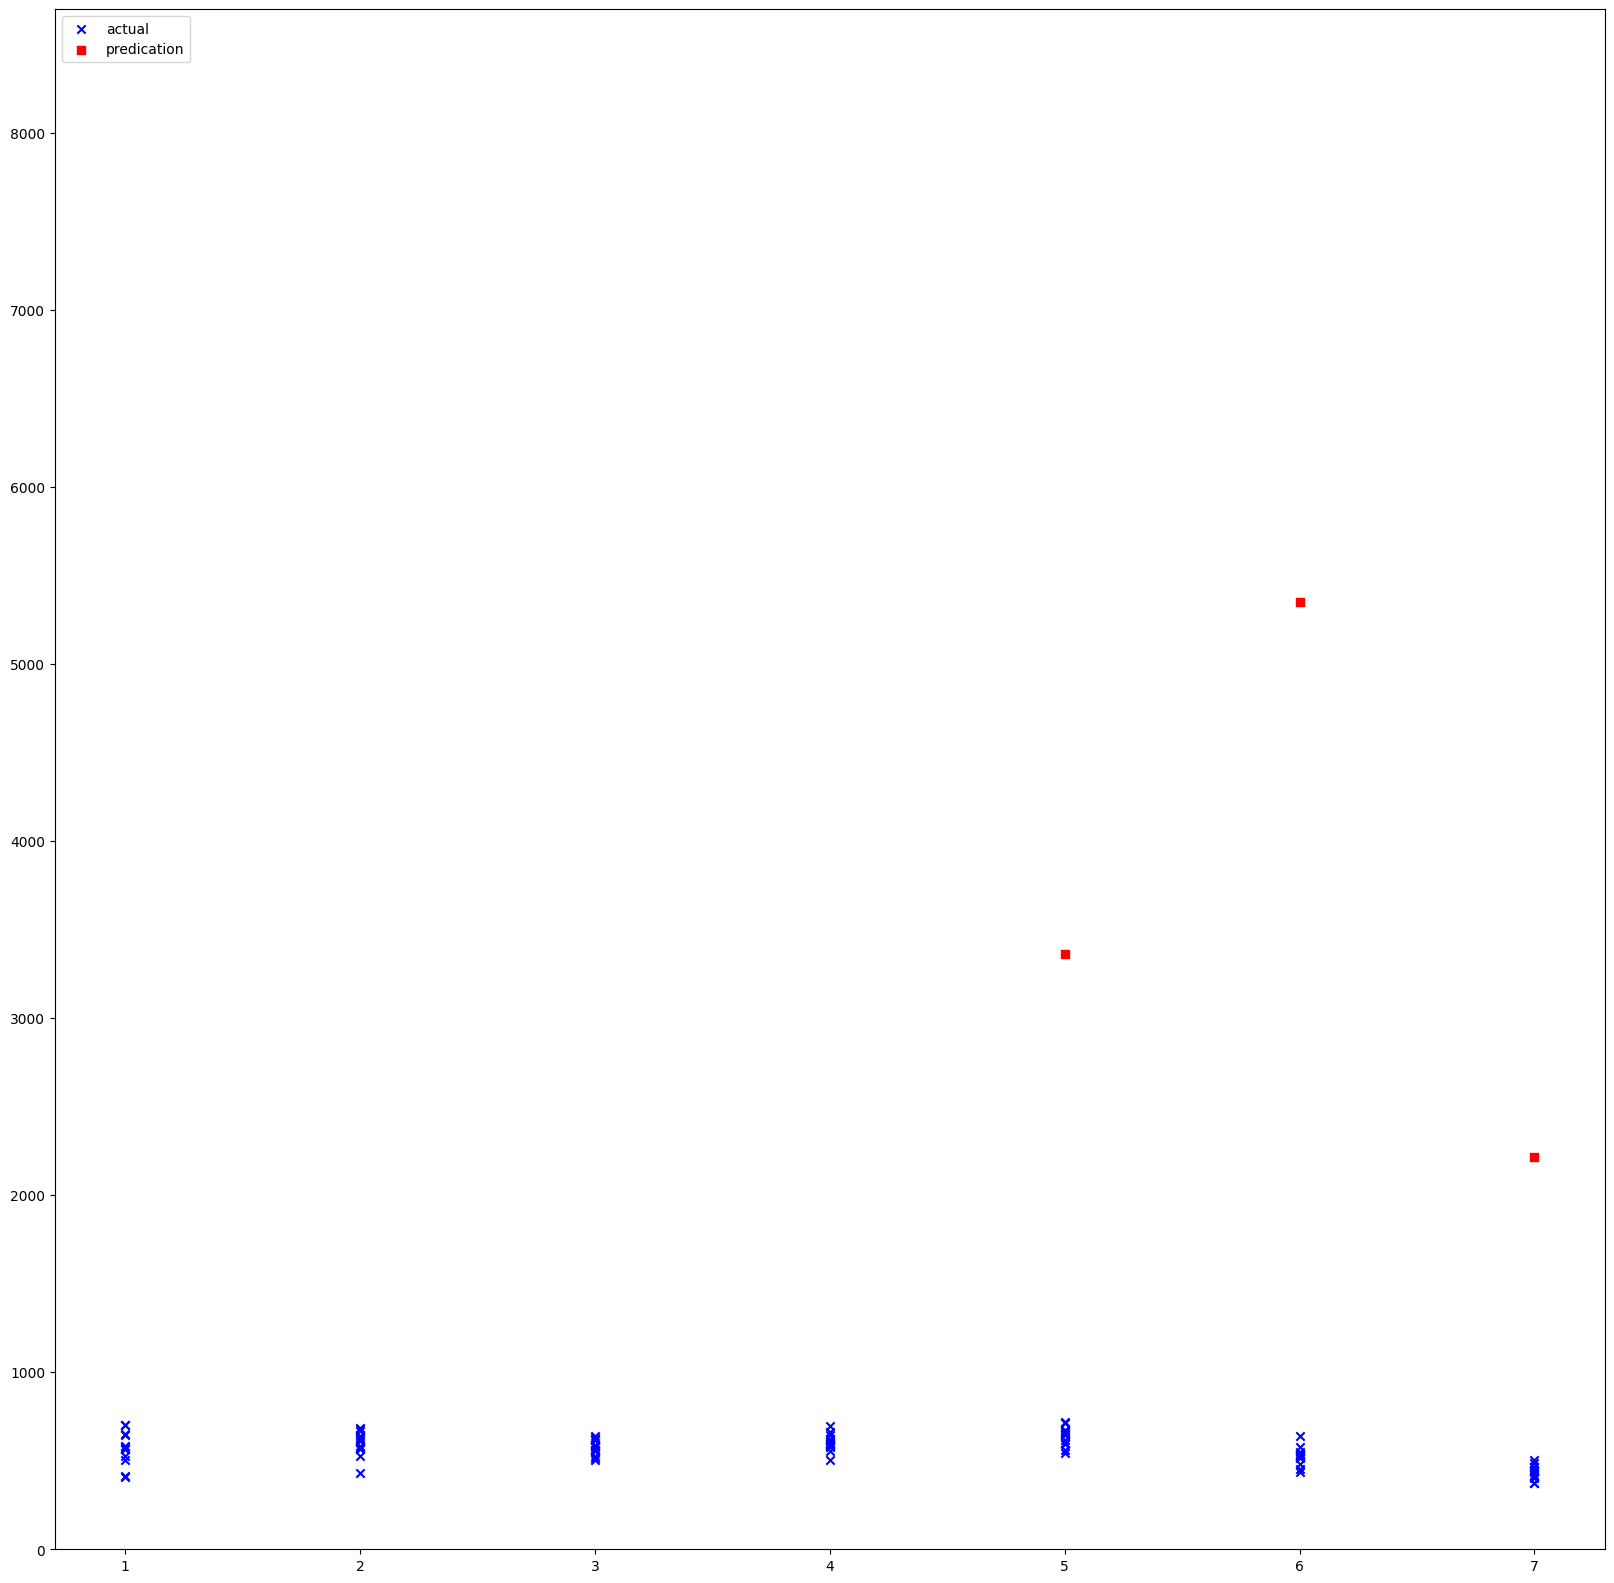

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
plt.scatter(df_2019_test_data["day"][:90], df_2019_test_data["NUM_COLLISIONS"][:90], c='b', marker='x', label='actual')
plt.scatter(df_2019_test_data["day"][:90], linear_multi_predictions[:90], c='r', marker='s', label='predication')
plt.ylim(0, 8700)
plt.legend(loc='upper left')
plt.show()

In [ ]:
df_2019_test_data_dnn = df_2019_test_data
# One-Hot Encoding for day
df_2019_test_data_dnn['day'] = df_2019_test_data_dnn['day'].map({ 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'})
df_2019_test_data_dnn = pd.get_dummies(df_2019_test_data_dnn, columns=['day'], prefix='', prefix_sep='')

# One-Hot Encoding for month
df_2019_test_data_dnn['mo'] = df_2019_test_data['mo'].map({ 1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
df_2019_test_data_dnn = pd.get_dummies(df_2019_test_data_dnn, columns=['mo'], prefix='', prefix_sep='')

In [ ]:
df_2019_test_data_dnn

,year,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,...,December,February,January,July,June,March,May,November,October,September
0,2019,1,01/01/2019,50.5,43.2,1009.8,7.0,999.9,999.9,999.9,...,0,0,1,0,0,0,0,0,0,0
1,2019,2,02/01/2019,38.0,23.2,1024.2,10.0,999.9,999.9,999.9,...,0,0,1,0,0,0,0,0,0,0
2,2019,3,03/01/2019,41.1,29.4,1015.8,9.9,999.9,999.9,999.9,...,0,0,1,0,0,0,0,0,0,0
3,2019,4,04/01/2019,39.7,26.4,1014.8,9.9,999.9,999.9,999.9,...,0,0,1,0,0,0,0,0,0,0
4,2019,5,05/01/2019,44.2,41.0,1003.3,5.3,999.9,999.9,999.9,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019,27,27/12/2019,49.4,40.9,1024.7,9.9,4.7,9.9,18.1,...,1,0,0,0,0,0,0,0,0,0
361,2019,28,28/12/2019,48.0,37.4,1021.5,8.3,3.8,7.0,999.9,...,1,0,0,0,0,0,0,0,0,0
362,2019,29,29/12/2019,42.6,30.2,1022.7,9.3,3.1,8.0,999.9,...,1,0,0,0,0,0,0,0,0,0
363,2019,30,30/12/2019,39.4,38.3,1012.4,2.7,10.0,20.0,34.0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd

# Assuming df_2019_test_data_dnn and df_2014_test_data_dnn are already defined

# Selecting columns from df_2019_test_data_dnn and df_2014_test_data_dnn
selected_columns_2019 = df_2019_test_data_dnn[["year", "temp", "dewp", "slp", "visib", "wdsp", "gust", "prcp"]]
selected_columns_2014 = df_2014_test_data_dnn[["sndp", "fog", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]]

# Concatenating selected columns
df_2019_test_data_dnn_cleaned = pd.concat([selected_columns_2019, selected_columns_2014], axis=1)

# Optionally, you can rename the columns
headers = ["year", "temp", "dewp", "slp", "visib", "wdsp", "gust", "prcp", "sndp", "fog", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df_2019_test_data_dnn_cleaned.columns = headers

df_2019_test_data_dnn_cleaned.head()



KeyError: "['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'] not in index"